##**Analyse de portefeuille intermédiaire en R**
+ *5 heures*
+ *12 Vidéos*
+ *42 Exercices*
+ *10 263 participants*
+ *3 250 XP*

####**Description du cours**

+ ***Ce cours s'appuie sur les concepts fondamentaux de l'introduction à l'analyse de portefeuille dans R et explore les concepts avancés du processus d'optimisation de portefeuille. Il est essentiel pour un analyste ou un gestionnaire de portefeuille de comprendre tous les aspects du problème d'optimisation de portefeuille afin de prendre des décisions éclairées. Dans ce cours, vous apprendrez une approche quantitative pour appliquer les principes de la théorie moderne du portefeuille pour spécifier un portefeuille, définir des contraintes et des objectifs, résoudre le problème et analyser les résultats. Ce cours utilisera le package R PortfolioAnalytics pour résoudre des problèmes d'optimisation de portefeuille avec des contraintes et des objectifs complexes qui reflètent les problèmes du monde réel.***

####**1) Introduction et théorie du portefeuille**

+ ***Ce chapitre vous donnera un bref aperçu de la théorie moderne du portefeuille et vous présentera le package PortfolioAnalytics en résolvant quelques problèmes d'optimisation de portefeuille.***

|OBJECTIFS|
|------------------|
Bienvenue au cours !
Charger le package PortfolioAnalytics
Résoudre un problème simple d'optimisation de portefeuille
Visualisez les résultats
Objectif de la théorie moderne du portefeuille
Définir le risque
Les défis de l'optimisation de portefeuille
Utilité quadratique
Maximiser la fonction d'utilité quadratique
Introduction à PortfolioAnalytics
Principaux objectifs de conception

####**2) Workflow d'optimisation de portefeuille**

+ ***L'objectif de ce chapitre est un aperçu détaillé du flux de travail recommandé pour résoudre les problèmes d'optimisation de portefeuille avec PortfolioAnalytics. Vous apprendrez à créer une spécification de portefeuille, à ajouter des contraintes, des objectifs, à exécuter l'optimisation et à analyser les résultats de la sortie d'optimisation.***

|OBJECTIFS|
|------------------|
Spécification du portefeuille, contraintes et objectifs
Créer une spécification de portefeuille
Ajouter des contraintes
Ajouter des objectifs
Exécution des optimisations
Optimisation sur une seule période
Optimisation avec rééquilibrage périodique
Solveurs globaux
Analyse des résultats d'optimisation
Valeurs de mesure objectives
Poids optimaux

####**3) Fonctions objectives et estimation de moment**
+ ***Dans ce chapitre, vous apprendrez à estimer les moments, les caractéristiques de la distribution des rendements des actifs, ainsi que les fonctions d'objectif personnalisées.***

|OBJECTIFS|
|------------------|
Présentation des instants
Exemples d'estimations de moment
Estimations de moment avancées
Méthode d'estimation des moments
Fonctions de moment personnalisées
Définir une fonction de moment personnalisée
Optimisation avec fonction de moment personnalisée
Fonctions objectives
Fonction objectif personnalisée
Optimisation avec fonction d'objectif personnalisée

####**4) Candidature**

+ ***Dans le dernier chapitre du cours, vous résoudrez un problème d'optimisation de portefeuille qui imite un exemple réel de construction d'un portefeuille de stratégie de fonds spéculatifs avec différentes définitions de style.***

|OBJECTIFS|
|------------------|
Application
Calculer les rendements de référence
Définir le problème d'optimisation de portefeuille
Référence
Backtest d'optimisation
Backtest avec rééquilibrage périodique
Affiner les contraintes et les objectifs
De meilleures estimations conduisent-elles à de meilleures performances ?
Analyser les résultats et comparer au benchmark

In [ ]:
# install the packages
install.packages('PortfolioAnalytics')
install.packages('MASS')
install.packages('quadprog')

In [ ]:
#ROI
#ROI.plugin.quadprog
#ROI.plugin.glpk
install.packages('ROI')
install.packages('ROI.plugin.quadprog')
install.packages('ROI.plugin.glpk')

In [ ]:
# Load the package
library(PortfolioAnalytics)
library(MASS)
library(ROI)
library(quadprog)

In [ ]:
function(R, moments, constraints, target, solver = "glpk", 
  control = NULL) 
{stopifnot("package:ROI" %in% search() || requireNamespace("ROI", 
  quietly = TRUE))
  plugin <- paste0("ROI.plugin.", solver)
  stopifnot(paste0("package:", plugin) %in% search() || requireNamespace(plugin, 
    quietly = TRUE))}

###**Bienvenue au cours!**

####**1. Bienvenue au cours!**
+ ***Bonjour, je m’appelle Ross Bennett. Je suis analyste dans un pupitre de négociation dans une société de négociation pour compte propre à Chicago. Je suis le co-auteur du package PortfolioAnalytics et contribue à plusieurs autres packages R utilisés en finance.***

####**2. Ce que vous apprendrez**
+ ***Ce cours s’appuiera sur les concepts fondamentaux du cours Introduction à l’analyse de portefeuille en R. Nous explorerons des concepts plus avancés dans le processus d’optimisation du portefeuille tels que les ensembles de contraintes et d’objectifs complexes, les méthodes d’estimation des moments, l’optimisation avec rééquilibrage périodique (également appelé backtesting) et les visualisations pour mieux comprendre le problème d’optimisation. L’objectif du cours est d’utiliser le package PortfolioAnalytics pour résoudre les problèmes d’optimisation de portefeuille qui reflètent les applications du monde réel.***

####**3. Théorie moderne du portefeuille**
+ Bien que la théorie moderne du portefeuille ait été introduite il y a plus de 60 ans, elle établit un cadre pour définir et évaluer les objectifs. 

+ **Dans le cadre de la théorie moderne du portefeuille, le portefeuille optimal qu’un investisseur doit détenir est le portefeuille qui maximise le rendement attendu du portefeuille pour un niveau de risque donné.** 

+ **L’approche académique suit l’approche de Markowitz en utilisant le rendement moyen comme mesure du gain et l’écart-type des rendements comme mesure du risque.** 

+ **Cependant, la plupart des problèmes du monde réel tiennent compte de différentes mesures du risque ainsi que de multiples objectifs et contraintes. Dans ce cours, vous explorerez à la fois l’approche Markowitz standard et des problèmes plus complexes similaires à ce que vous rencontrerez dans l’industrie.**

####**4. Moyenne - Écart type Exemple : Configuration**

+ **Commençons par un exemple pour montrer comment vous pouvez utiliser PortfolioAnalytics pour résoudre un problème de portefeuille à l’aide du cadre Modern Portfolio Theory afin de maximiser le rendement moyen et de minimiser l’écart-type**. 

+ Vous commencez par charger la bibliothèque PortfolioAnalytics et un exemple de jeu de données. 

+ Dans l’exemple de cette vidéo, vous utiliserez les 8 premières colonnes du jeu de données edhec. 

+ **Le jeu de données edhec contient les rendements mensuels des rendements de l’indice composite EDHEC de type hedge funds**. 

+ **Vous pouvez créer l’objet de spécification de portefeuille en l’initialisant avec les noms de colonne du jeu de données comme noms de ressources**. 

+ Maintenant, vous ajoutez deux contraintes à la spécification du portefeuille, l’investissement complet et les contraintes longues seulement. 

+ **La contrainte d’investissement totale signifie que la somme des pondérations doit être égale à 1**. 

+ **La contrainte de seulement long signifie que tous les poids doivent être positifs.** 


+ **Vous avez deux objectifs dans le problème du portefeuille**, 
  + **l’un pour maximiser le rendement moyen du portefeuille** 
  + **et l’autre pour minimiser l’écart-type du portefeuille.** 
  
+ **Pour l’objectif de rendement moyen, le type d’objectif est « retour » car vous souhaitez maximiser l’objectif**. 

+ **Le nom de l’objectif est « moyen » pour le rendement moyen du portefeuille.** 

+ **Pour l’objectif de risque de l’écart-type, le type d’objectif est « risque » parce que vous voulez minimiser l’objectif.** 

+ **Le nom de l’objectif est « StdDev » pour l’écart-type du portefeuille. Ne vous inquiétez pas si c’est beaucoup à prendre pour l’instant, vous verrez beaucoup d’autres exemples dans ce cours!**

####**5. Moyenne - Écart type Exemple : Sortie**

+ Vous pouvez maintenant imprimer l’objet de spécification de portefeuille pour afficher une représentation concise de la spécification. 

+ Vous voyez les noms des actifs du portefeuille, une liste des contraintes et une liste des objectifs. 

+ Dans ce cas, vous pouvez voir que la spécification du portefeuille se compose de 8 actifs, 2 contraintes (investissement complet et long uniquement) et 2 objectifs (moyenne et écart-type).

####**6. Moyenne - Exemple d’écart-type : Optimiser**

+ **Dans cette diapositive, vous pouvez voir comment exécuter l’optimisation et visualiser les résultats du portefeuille optimal**. 

+ **Pour exécuter l’optimisation, appelez la fonction optimize.portfolio en transmettant les données de rendement, l’objet de spécification de portefeuille et la méthode d’optimisation.** 

+ **Notez que vous spécifiez optimize_method = « random » pour utiliser l’algorithme de portefeuilles aléatoires afin de résoudre le problème.** 

+ **Notez également que vous spécifiez trace = TRUE. Cela stocke les résultats de chaque itération de l’optimisation**. 

+ Vous pouvez tracer le portefeuille optimal en termes de risque et de rendement avec le graphique. 

+ **Fonction RiskReward, en transmettant la sortie d’optimisation, les noms d’objectifs à utiliser pour le risque et le rendement, et TRUE ou FALSE si vous souhaitez tracer les actifs.**

####**7. Moyenne - Exemple d’écart-type : Optimiser**
+ ***Vous pouvez le voir dans le graphique de la diapositive où les points gris sont les valeurs objectives d’une itération donnée. Collectivement, ces portefeuilles forment l’espace des possibles, l’ensemble des portefeuilles qui satisfont aux contraintes spécifiées.***

####**8. Entraînons-nous!**
+ Maintenant, commençons et jetons un coup d’œil à quelques exercices initiaux.

###**EXERCICES**

####**Charger le package PortfolioAnalytics**
+ ***Le progiciel PortfolioAnalytics sera utilisé tout au long de ce cours pour l'optimisation et l'analyse du portefeuille. Nous utiliserons le jeu de données d'index inclus dans le package PortfolioAnalytics pour les exercices restants de ce chapitre. Dans cet exercice, nous allons charger le package et préparer les données pour le problème d'optimisation de portefeuille dans l'exercice suivant.***

####**Instructions**

+ Chargez le package PortfolioAnalytics.
+ Chargez le jeu de données des index.
+ Créez un sous-ensemble de l'ensemble de données d'index pour utiliser les quatre premières colonnes et affectez-le à une variable nommée index_returns.
+ Imprimez l'en-tête des index_returns.



In [7]:
# Load the package
library(PortfolioAnalytics)

# Load the data
data(indexes)

# Subset the data
index_returns <- indexes[, c(1:4)]

In [8]:
# Print the head of the data
head(index_returns)

Warning message in tzone.xts(x):
“index does not have a ‘tzone’ attribute”
Warning message in tclass.xts(x):
“index does not have a ‘tclass’ attribute”
Warning message in tclass.xts(x):
“index does not have a ‘tclass’ attribute”
Warning message:
“object index class (Date) does not support timezones.
Expected 'UTC' timezone, but tzone is ‘’”
Warning message in tzone.xts(x):
“index does not have a ‘tzone’ attribute”
Warning message in tclass.xts(x):
“index does not have a ‘tclass’ attribute”


           US Bonds US Equities Int'l Equities Commodities
1980-01-31  -0.0272      0.0610         0.0462      0.0568
1980-02-29  -0.0669      0.0031        -0.0040     -0.0093
1980-03-31   0.0053     -0.0987        -0.1188     -0.1625
1980-04-30   0.0992      0.0429         0.0864      0.0357
1980-05-31   0.0000      0.0562         0.0446      0.0573
1980-06-30   0.0605      0.0296         0.0600      0.0533

####**Résoudre un problème simple d'optimisation de portefeuille**


+ ***Ce premier exercice vous apprendra à résoudre un problème simple d'optimisation de portefeuille à l'aide de PortfolioAnalytics. Vous apprendrez à créer un objet de spécification de portefeuille, à ajouter des contraintes et des objectifs et à résoudre le problème d'optimisation. Le problème du portefeuille consiste à former un portefeuille à variance minimale soumis à un investissement complet et à des contraintes longues uniquement. L'objectif est de minimiser la variance du portefeuille. Il y a deux contraintes dans ce problème : la contrainte d'investissement complet signifie que les poids doivent totaliser 1, et la contrainte longue uniquement signifie que tous les poids doivent être supérieurs ou égaux à 0 (c'est-à-dire qu'aucune position courte n'est autorisée).***

####**Instructions**

+ Créez un objet de spécification de portefeuille à l'aide des noms d'actifs du jeu de données index_returns et nommez l'objet de spécification de portefeuille port_spec.
+ Ajoutez une contrainte d'investissement complète de sorte que les pondérations totalisent 1 à l'objet port_spec.
+ Ajoutez une contrainte longue uniquement telle que le poids d'un actif soit compris entre 0 et 1 à l'objet port_spec.
+ Ajoutez un objectif pour minimiser l'écart type du portefeuille à l'objet port_spec.
+ Résolvez le problème d'optimisation de portefeuille à l'aide d'optimize_method = "ROI". 
+ Affectez les résultats de l'optimisation à un objet nommé opt.

In [9]:
# Create the portfolio specification
port_spec <- portfolio.spec(colnames(index_returns))
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   



In [10]:
# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio = port_spec, type = "full_investment")
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 



In [11]:
# Add a long only constraint such that the weight of an asset is between 0 and 1
port_spec <- add.constraint(portfolio = port_spec, type = "long_only")
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 
		- long_only 



In [12]:
# Add an objective to minimize portfolio standard deviation
port_spec <- add.objective(portfolio = port_spec, type = "risk", name = "StdDev")
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 
		- long_only 

Objectives:
Enabled objective names
		- StdDev 



In [ ]:
# Solve the optimization problem
opt <- optimize.portfolio(index_returns, portfolio = port_spec, optimize_method = "ROI")

***Comme vous le verrez, la modularité des contraintes et des objectifs rend cela très flexible !***

####**Visualisez les résultats**
+ ***Maintenant que nous avons exécuté l'optimisation, nous aimerions examiner la sortie et les résultats. Rappelez-vous que la sortie de l'optimisation se trouve dans une variable nommée opt. Dans notre cas, pour l'optimisation du portefeuille de l'exercice précédent, nous nous intéressons aux poids optimaux et à la valeur objective estimée. Les pondérations sont considérées comme optimales dans le sens où l'ensemble de pondérations minimise la valeur objective, l'écart-type du portefeuille et satisfait les contraintes d'investissement complet et long uniquement basées sur les données historiques.***

+ *Notez que vous ne reconnaîtrez pas certaines de ces fonctions pour le moment. Ne t'inquiète pas! Ils seront tous présentés tout au long du cours.*

####**Instructions**

+ Imprimez la sortie de l'optimisation du problème précédent. La sortie est stockée dans une variable nommée opt.
+ Extrayez les poids optimaux avec extractWeights().
+ Tracez les poids optimaux avec chart.Weights().


In [14]:
# Print the results of the optimization
print(opt)

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = index_returns, portfolio = port_spec, 
    optimize_method = "ROI")

Optimal Weights:
      US Bonds    US Equities Int'l Equities    Commodities 
        0.8544         0.0587         0.0000         0.0869 

Objective Measure:
 StdDev 
0.01668 





In [16]:
# Extract the optimal weights
print(extractWeights(opt))

      US Bonds    US Equities Int'l Equities    Commodities 
    0.85441777     0.05872385     0.00000000     0.08685838 


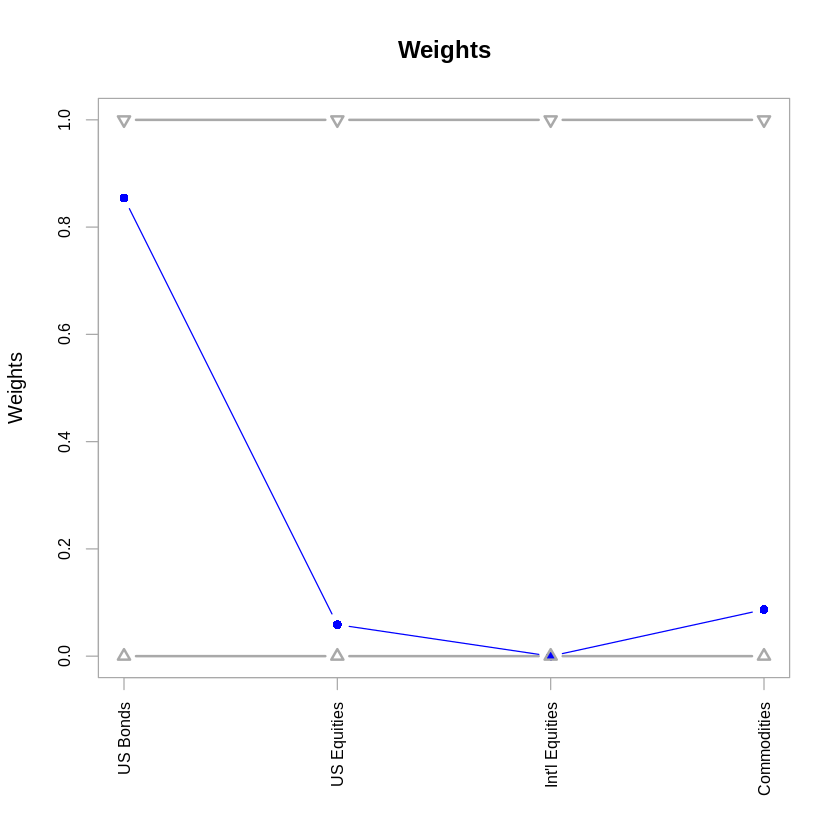

In [17]:
# Chart the optimal weights
chart.Weights(opt)

***Génial! La visualisation est importante pour toute analyse, en particulier l'optimisation de portefeuille.***

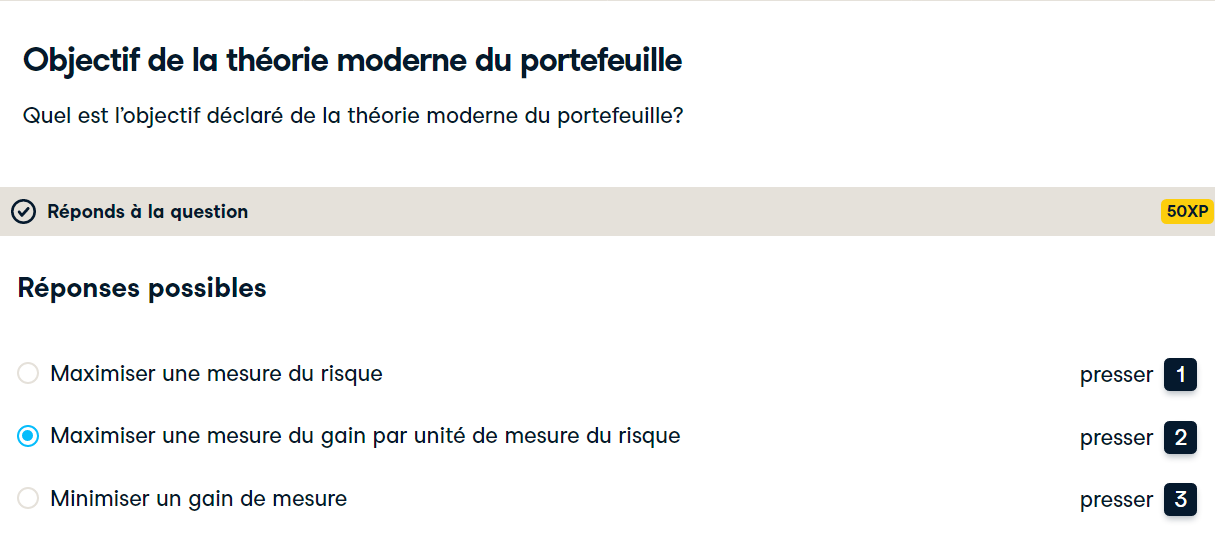

***Corriger! MPT consiste à maximiser le gain tout en contrôlant simultanément le risque.***

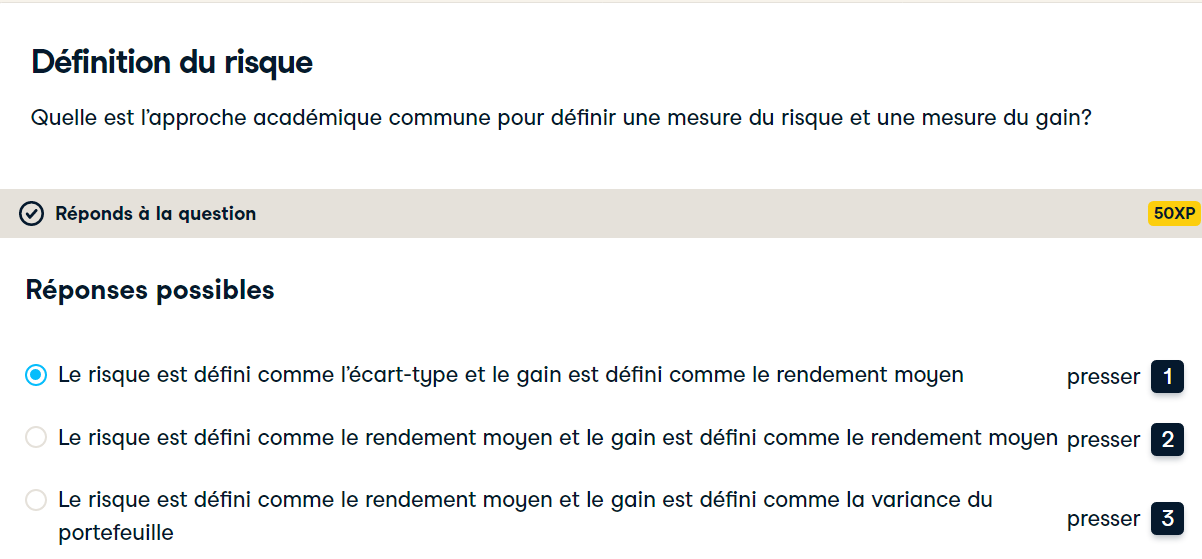

***Corriger! Sur le plan académique, le risque et le gain sont définis comme l’écart-type et le rendement moyen. En pratique, de nombreuses autres mesures de risque et de gain sont également utilisées!***


###**Les défis de l’optimisation du portefeuille**
####**1. Les défis de l’optimisation du portefeuille**
+ ***L’optimisation du portefeuille est un problème difficile.***

####**2. Défis**
+ **L’un des défis consiste à savoir quel solveur utiliser et les capacités et limites du solveur choisi.** 

+ **Un solveur est un algorithme conçu pour trouver la solution optimale à un problème donné. Vous pouvez choisir un solveur en fonction de l’objectif ou formuler l’objectif pour qu’il corresponde au solveur choisi**

+ **Idéalement, vous voulez la flexibilité de basculer sans effort entre les solveurs en fonction du problème**. 

+ **Dans de nombreux cas, il y a plus d’un solveur qui peut résoudre le problème et vous devriez évaluer les deux**. 

+ Un exemple de solveur de forme fermée est un solveur de programmation quadratique. 

+ **Le principal avantage des solveurs de forme fermée est qu’ils résolvent un problème donné très rapidement et efficacement et renvoient une solution exacte**. 

+ **Le principal inconvénient est que le problème doit être formulé d’une manière très spécifique qui est généralement unique au solveur**. 

+ **Un exemple de solveur global est l’optimisation de l’évolution différentielle**. 

+ **Les solveurs globaux ont l’avantage de pouvoir résoudre des types de problèmes plus généraux et de trouver la solution approximative du minimum ou du maximum global de la fonction objectif avec des minima ou des maxima locaux**. 

+ Cependant, les algorithmes utilisés dans les solveurs globaux sont relativement plus complexes et plus gourmands en calcul. Dans ce cours, vous utiliserez à la fois des solveurs fermés et des solveurs globaux et apprendrez comment PortfolioAnalytics surmonte ces défis de l’optimisation du portefeuille**.

####**3. Utilité quadratique**

+ **Pour cet exemple suivant, vous considérerez un problème d’optimisation de portefeuille où l’objectif est de maximiser l’utilité quadratique, soumis aux contraintes telles que le poids de chaque actif doit être supérieur ou égal à zéro et la somme des pondérations doit être égale à 1**. 

+ **L’intuition derrière cette formulation, est que vous maximisez le rendement du portefeuille, avec un terme de pénalité pour la variance du portefeuille.** 

+ **Le premier terme est le rendement attendu du portefeuille, la transposition du vecteur pondération multiplié par le vecteur de rendement attendu.** 

+ **Le second terme est lambda multiplié par la variance du portefeuille, la transposition du vecteur pondération multipliée par la matrice variance-covariance des rendements des actifs multipliée par le vecteur pondération.** 

+ **Le terme lambda est souvent appelé paramètre d’aversion au risque, une valeur plus élevée pour lambda signifie une pénalité plus élevée pour la variance du portefeuille.**

####**4. Solveur de programmation quadratique**
+ **Vous pouvez utiliser la fonction solve-dot-QP() du package quadprog pour résoudre le problème de maximisation de l’utilité quadratique-dot-solve-dot-qp résout les problèmes de programmation quadratique de la forme comme indiqué dans la diapositive pour minimiser le négatif de la transposition du vecteur $d$ fois le vecteur $b$ plus la moitié de la transposition du vecteur $b$ fois la matrice $D$ multipliée par le vecteur $b$. 

+ Notez les similitudes entre la forme illustrée ici et l’utilitaire quadratique de la diapositive précédente. Vous pouvez remplacer les pondérations par le vecteur $b$, les rendements attendus par le vecteur $d$ et la matrice variance-covariance par la matrice $D$. 

+ Notez également que les signes sont différents. Ce n’est pas grave, car minimiser le négatif d’un objectif équivaut à maximiser l’objectif.

####**5. Optimisation de l’utilité quadratique**

+ Le code de cette diapositive résout le problème d’optimisation de l’utilitaire quadratique avec solve. 

+ $QP$ du package quadprog. Ne vous inquiétez pas de tout comprendre sur cette diapositive. 

+ Le point principal est de démontrer ce qu’il faut pour configurer et résoudre un problème directement avec un solveur de programmation quadratique dans R. 

+ C’est beaucoup de travail pour un problème simple et sujet aux erreurs. 

+ Que se passe-t-il si nous voulons utiliser un autre solveur ? Ajouter, supprimer ou modifier des contraintes ? 

+ Nous devons tout recommencer pour nous adapter à l’autre solveur. 

+ Cela peut être difficile, même pour des problèmes triviaux. 

+ Il y a peu de prise en charge de la visualisation lors de l’utilisation directe de solveurs, et il arrive souvent que les visualisations soient spécifiques au solveur. 

+ Tout au long des exercices et des vidéos de ce cours, vous apprendrez à modifier facilement les contraintes et les objectifs, visualisez des visualisations intuitives pertinentes pour le problème d’optimisation de portefeuille avec le package PortfolioAnalytics.

####**6. Entraînons-nous!**
+ Passons à d’autres exercices.

###**EXERCICES**

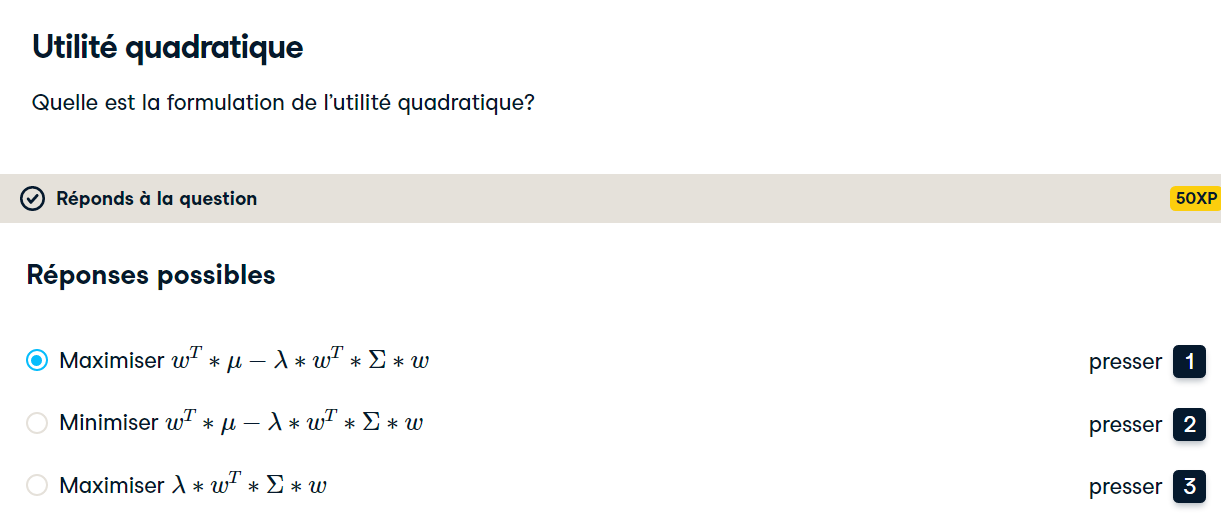

***Corriger! Cette formule maximise le rendement attendu tout en pénalisant l’écart-type mis à l’échelle par le paramètre d’aversion au risque, lambda!***

####**Maximiser la fonction d'utilité quadratique**

+ ***Dans la vidéo sur les défis de l'optimisation de portefeuille, vous avez vu comment résoudre un problème d'optimisation d'utilité quadratique avec le package [quadprog](https://www.rdocumentation.org/packages/quadprog/versions/1.5-5). Cet exercice vous montrera comment résoudre un problème d'utilité quadratique à l'aide du package PortfolioAnalytics. Rappelons que la formulation de l'utilité quadratique a deux termes, un pour le rendement moyen du portefeuille et un autre pour la variance du portefeuille avec un paramètre d'aversion au risque, lambda.***

####**Instructions**

+ Créez un objet de spécification de portefeuille à l'aide des noms d'actifs du jeu de données index_returns et nommez l'objet de spécification de portefeuille port_spec.
+ Ajoutez une contrainte d'investissement complète de sorte que les pondérations totalisent 1 à l'objet port_spec.
+ Ajoutez une contrainte longue uniquement telle que le poids d'un actif soit compris entre 0 et 1 à l'objet port_spec.
+ Ajoutez un objectif pour maximiser le retour moyen du portefeuille sur l'objet port_spec.
+ Ajoutez un objectif pour minimiser la variance du portefeuille à l'objet port_spec. L'aversion au risque doit être fixée à 10.
+ Exécutez l'optimisation. Ce problème peut être résolu par un solveur de programmation quadratique, nous spécifions donc optimise_method = "ROI"

In [18]:
# Create the portfolio specification
port_spec <- portfolio.spec(assets = colnames(index_returns))

In [19]:
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   


In [20]:
# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio = port_spec, type = 'full_investment')

In [21]:
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 


In [22]:
# Add a long only constraint such that the weight of an asset is between 0 and 1
port_spec <- add.constraint(portfolio = port_spec, type = 'long_only')

In [23]:
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 
		- long_only 


In [24]:
# Add an objective to maximize portfolio mean return
port_spec <- add.objective(portfolio = port_spec, type = 'return', name = "mean")

In [25]:
port_spec 

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 
		- long_only 

Objectives:
Enabled objective names
		- mean 


In [26]:
# Add an objective to minimize portfolio variance
port_spec <- add.objective(portfolio = port_spec, type = 'risk', name = 'var', risk_aversion = 10)

In [27]:
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(index_returns))

Number of assets: 4 
Asset Names
[1] "US Bonds"       "US Equities"    "Int'l Equities" "Commodities"   

Constraints
Enabled constraint types
		- full_investment 
		- long_only 

Objectives:
Enabled objective names
		- mean 
		- var 


In [ ]:
# Solve the optimization problem
opt <- optimize.portfolio(R = index_returns, portfolio = port_spec, optimize_method = "ROI")

In [29]:
print(opt)

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = index_returns, portfolio = port_spec, 
    optimize_method = "ROI")

Optimal Weights:
      US Bonds    US Equities Int'l Equities    Commodities 
        0.8507         0.1152         0.0000         0.0341 

Objective Measure:
    mean 
0.006914 


 StdDev 
0.01708 





***Bon travail! Avoir une manière cohérente de résoudre les problèmes d'optimisation rend cela beaucoup plus simple que ce qui a été montré dans les diapositives.***

###**Introduction à PortfolioAnalytics**

####**1. Introduction à PortfolioAnalytics**
+ ***PortfolioAnalytics a été conçu spécifiquement pour répondre aux problèmes abordés dans la vidéo et les exercices précédents.***

####**2. Analyse de portefeuille**

+ **Les composants clés de l’architecture de PortfolioAnalytics sont la modularité et la flexibilité.** 

+ **Les multiples types et la modularité des contraintes et des objectifs vous permettent d’ajouter, de supprimer et de combiner très facilement plusieurs types de contraintes et d’objectifs**. 

+ Une fonction objective peut être définie comme toute fonction R valide. Cela signifie que vous n’êtes pas limité à un type ou à un ensemble de problèmes spécifiques. 

+ Comme les fonctions objectives, vous pouvez définir des fonctions de moment personnalisées comme n’importe quelle fonction R valide. 

+ La visualisation aide à construire l’intuition sur le problème et à comprendre l’espace réalisable des portefeuilles. 

+ Un autre avantage clé est que PortfolioAnalytics prend en charge plusieurs solveurs et vous permet de spécifier différents solveurs avec peu ou pas de modifications à la spécification du portefeuille.

####**3. Cadre PortfolioAnalytics**
+ ***Ce diagramme est une représentation de haut niveau d’un cadre d’optimisation de portefeuille***. 

+ **Les intrants sont les actifs, les contraintes, les objectifs et les moments de rendement des actifs***. 

+ **Les actifs, les contraintes et les objectifs sont définis par le gestionnaire de portefeuille**. 

+ **Le flux de travail dans PortfolioAnalytics suit ce diagramme**. 

+ **Tout d’abord, vous spécifiez un portefeuille d’actifs, puis ajoutez des contraintes et des objectifs à la spécification du portefeuille.**

+ **Ensuite, vous exécutez l’optimisation en fonction de la spécification du portefeuille et des estimations des moments de rendement des actifs. La dernière étape consiste à analyser le portefeuille optimal qui est la sortie du solveur.**

####**4. Entraînons-nous!**
+ Dans les prochains chapitres de ce cours, nous passerons en revue chaque composante en détail. Bonne chance!

###**EXERCICES**

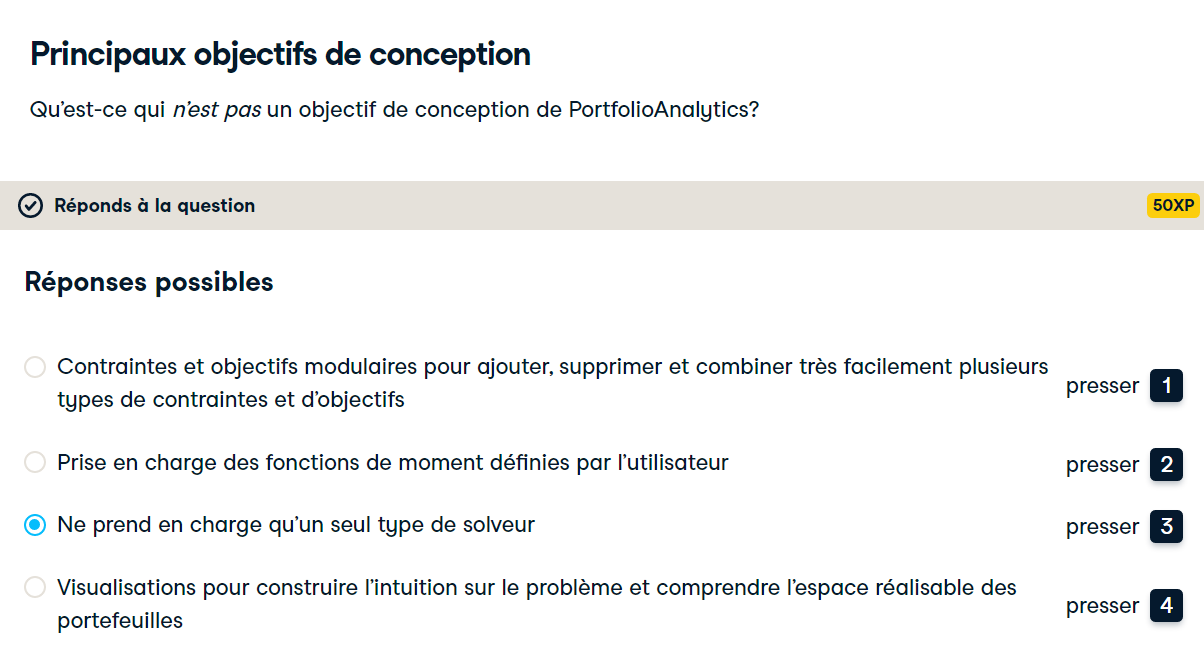

***Corriger! PortfolioAnalytics passe facilement d’un certain nombre de solveurs !***

###**Spécification, contraintes et objectifs du portefeuille**


####**1. Spécification, contraintes et objectifs du portefeuille**
+ ***Vous allez maintenant apprendre les détails de chaque étape du flux de travail pour résoudre les problèmes d’optimisation de portefeuille dans PortfolioAnalytics.***

####**2. Vue d’ensemble du flux de travail**

+ ***La première étape de la configuration d’un problème d’optimisation de portefeuille dans PortfolioAnalytics consiste à créer la spécification de portefeuille. Une fois que vous avez créé la spécification de portefeuille, l’étape suivante consiste à ajouter des contraintes et des objectifs à la spécification de portefeuille. L’étape suivante consiste à exécuter l’optimisation en fonction des spécifications, des contraintes et des objectifs du portefeuille. La dernière étape consiste à analyser le résultat de l’optimisation.***

####**3. Flux de travail : spécification du portefeuille**

+ **La première étape du flux de travail consiste à créer la spécification de portefeuille avec la fonction portfolio.spec**. 

+ **La spécification de portefeuille est un objet S3 qui contient des données, des contraintes et des objectifs au niveau du portefeuille**. 

+ Le seul argument requis pour portfolio.spec est l’actif. Les autres arguments sont facultatifs et ne sont pas importants pour ce cours. 

+ **L’argument assets peut être un vecteur de caractères de noms de ressources, un vecteur nommé de poids initiaux ou un scalaire spécifiant le nombre de ressources. La diapositive illustre ces différentes façons de définir l’argument assets.**

####**4. Workflow : ajouter des contraintes**

+ **Vous ajouterez des contraintes à la spécification du portefeuille avec la fonction add.constraint.** 

+ **L’argument portfolio est l’objet de spécification de portefeuille auquel vous souhaitez ajouter la contrainte.** 

+ **Le type doit être l’un des types de contraintes pris en charge. Les types de contraintes que vous utiliserez le plus dans le cours sont 'weight_sum' et 'box'.** 

+ **Le type weight_sum est une contrainte sur la somme des poids et le type de boîte est une contrainte sur le poids minimum et maximum d’un actif individuel**. 

+ **Notez que le type 'full_investment' est un cas particulier du type 'weight_sum' qui définit min_sum et max_sum égal à 1**. 

+ Les arguments nommés sont transmis via des points au constructeur du type de contrainte spécifié. 

+ Vous pouvez voir un exemple de ceci dans la diapositive où min est égal à 0-point-2 et max égal à 0-point-6 sont passés pour la contrainte de boîte. 

+ Cela signifie que vous ajoutez une contrainte de boîte telle que le poids minimal d’une ressource est de 0,2 et le poids maximal de tout actif est de 0 point 6.

+  Il est important de souligner que chaque contrainte que vous ajoutez est un objet distinct et stocké dans l’emplacement des contraintes de l’objet de portefeuille. 

+ **De cette façon, les contraintes sont modulaires et on peut facilement ajouter, supprimer ou modifier les contraintes dans l’objet portefeuille.**

####**5. Flux de travail : ajouter des objectifs**

+ **Comme pour l’ajout de contraintes, vous ajouterez des objectifs à la spécification du portefeuille avec la fonction add.objective**. 

+ L’argument portfolio est l’objet de spécification de portefeuille auquel vous souhaitez ajouter l’objectif. 

+ Le type doit être l’un des types d’objectifs pris en charge. 

+ Les types d’objectifs que vous utiliserez le plus dans le cours sont « rendement » et « risque ». 

+ **Un type objectif de « rendement » signifie que vous cherchez à maximiser la valeur objective tandis que le type d’objectif « risque » signifie que vous cherchez à minimiser la valeur objective. Le nom doit correspondre au nom de la fonction objective**. 

+ Par exemple, « ES » est une fonction du package PerformanceAnalytics qui calcule le déficit attendu du portefeuille. 

+ Des arguments supplémentaires à la fonction objectif peuvent être transmis sous forme de liste nommée aux arguments. 

+ Vous pouvez en voir un exemple dans la diapositive où nous ajoutons l’objectif de risque pour minimiser le déficit attendu du portefeuille avec un niveau de confiance de 90% (p est égal à 0 point 90) et utilisons la méthode gaussienne dans l’estimation. 

+ **Tout comme les contraintes, chaque objectif que vous ajoutez est un objet distinct et stocké dans l’emplacement des objectifs de l’objet de portefeuille. De cette façon, les objectifs sont modulaires et on peut facilement ajouter, supprimer ou modifier les objectifs dans l’objet portefeuille.**

####**6. Entraînons-nous!**
+ Passons maintenant à quelques exercices.

###**EXERCICES**

####**Créer une spécification de portefeuille**

+ ***La première étape du workflow de PortfolioAnalytics consiste à créer l'objet de spécification de portefeuille. La spécification de portefeuille contient des données, des contraintes et des objectifs au niveau du portefeuille. Le seul argument requis pour portfolio.spec() est assets. assets peut être le nombre d'assets, un vecteur nommé de poids de départ ou un vecteur de caractères des noms d'assets. L'argument category_labels est utilisé pour étiqueter les actifs par une catégorie telle que le secteur, l'industrie, la région, la classe d'actifs ou la devise. L'argument weight_seq vous permet de spécifier une séquence de départ de pondérations utilisées par les algorithmes de portefeuilles aléatoires. La pratique courante consiste à transmettre les noms de colonne de l'objet de retour pour l'argument assets.***

####**Instructions**

+ Attribuez les noms de colonne de l'objet asset_returns à une variable appelée asset_names.
+ Créez un objet de spécification de portefeuille et transmettez asset_names pour l'argument assets. Affectez la spécification de portefeuille à une variable nommée port_spec.
+ Obtenez la classe de l'objet de spécification de portefeuille.
+ Imprimez l'objet de spécification de portefeuille.

In [30]:
data(edhec)
asset_returns <- edhec

In [31]:
# Get the column names of the returns data
asset_names <- colnames(asset_returns)

# Create a portfolio specification object using asset_names
port_spec <- portfolio.spec(asset_names)

In [32]:
# Get the class of the portfolio specification object
class(port_spec)

[1] "portfolio.spec" "portfolio"

In [33]:
# Print the portfolio specification object
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10



***Super! Maintenant que vous avez la spécification de base, ajoutons quelques contraintes.***

####**Ajouter des contraintes**

+ ***Les contraintes sont ajoutées à l'objet de spécification de portefeuille avec la fonction add.constraint(). Chaque contrainte ajoutée est un objet séparé et stocké dans l'emplacement des contraintes dans l'objet du portefeuille. De cette manière, les contraintes sont modulaires et on peut facilement ajouter, supprimer ou modifier les contraintes dans l'objet portfolio. Les arguments requis pour add.constraint() sont le portefeuille auquel la contrainte est ajoutée, le type de contrainte et les arguments nommés passés via ... au constructeur du type de contrainte.***

+ Types de contraintes de base :

  + Spécifier la contrainte sur la somme des poids

    + weight_sum, poids, effet de levier

  + full_investment est un cas particulier qui définit 
    + min_sum = max_sum = 1

  + dollar_neutral est un cas particulier qui définit 
    + min_sum = max_sum = 0

  + Spécifier des contraintes pour les pondérations individuelles des actifs boîte
    + long_only est un cas particulier qui définit 
      + min = 0 et max = 1
  + Spécifiez la contrainte pour la somme des poids des actifs par groupe (secteur, région, classe d'actifs, etc.)
groupe
  + Spécifiez une contrainte sur le rendement moyen cible
retour


+ *Dans cet exercice, vous allez ajouter quelques-uns des types de contraintes les plus courants. Outre les types de contraintes de base répertoriés ci-dessus, PortfolioAnalytics prend également en charge les types de contraintes de limite de position, de rotation, de diversification, d'exposition aux facteurs et d'exposition à l'effet de levier. Si vous êtes intéressé par les autres types de contraintes, consultez les fichiers d'aide des constructeurs de contraintes. Les fichiers d'aide incluent une description du type de contrainte ainsi qu'un exemple de code.*

####**Instructions**

+ Ajoutez une contrainte weight_sum telle que la somme minimale des poids soit 1 et la somme maximale des poids soit 1.
+ Ajoutez une contrainte de boîte telle que les cinq premiers actifs aient un poids minimum de 10 % et les actifs restants aient un poids minimum de 5 %. 
+ Tous les actifs ont un poids maximum de 40 %
+ Ajoutez une contrainte de groupe telle que les actifs 1, 5, 7, 9, 10 et 11 sont le premier groupe et les actifs 2, 3, 4, 6, 8 et 12 sont le deuxième groupe. 
+ Réglez le poids minimum à 40 % et le poids maximum à 60 % pour chaque groupe.

In [35]:
# Add the weight sum constraint
port_spec <- add.constraint(portfolio = port_spec, type = 'weight_sum', min_sum = 1, max_sum = 1)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 


In [36]:
# Add the box constraint
port_spec <- add.constraint(portfolio = port_spec, type = 'box', min = c(0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), max = 0.4)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 
		- box 


In [ ]:
# Add the group constraint
port_spec <- add.constraint(portfolio = port_spec, type = 'group', groups = list(c(1, 5, 7, 9, 10, 11), c(2, 3, 4, 6, 8, 12)), group_min = 0.4, group_max = 0.6)

In [38]:
# Print the portfolio specification object
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 
		- box 
		- group 



***Fantastique! Il existe un certain nombre de types de contraintes différents, vérifiez-les en utilisant ?add.constraint***

In [34]:
?add.constraint

####**Ajouter des objectifs**

+ ***Les objectifs sont ajoutés à l'objet portfolio avec la fonction add.objective(). Chaque objectif ajouté est un objet séparé et stocké dans l'emplacement des objectifs dans l'objet de spécification du portefeuille. De cette façon, les objectifs sont modulaires et on peut facilement ajouter, supprimer ou modifier les objets objectifs. L'argument name doit être une fonction R valide. Plusieurs fonctions sont disponibles dans le package PerformanceAnalytics, mais les fonctions définies par l'utilisateur peuvent également être utilisées comme fonctions objectives. Les arguments requis pour add.objective() sont le portefeuille auquel l'objectif est ajouté, le type d'objectif, le nom de l'objectif et les arguments nommés transmis via ... au constructeur du type d'objectif. Les arguments de la fonction objectif sont spécifiés sous la forme d'une liste nommée d'arguments.***

+ Types d'objectifs de base :

  + **return** : ce type d'objectif cherche à maximiser l'objectif.
  + **risk** : Ce type d'objectif cherche à minimiser l'objectif.
  + **risk_budget** : ce type d'objectif cherche à minimiser la concentration du risque ou à pénaliser la contribution au risque qui dépasse le pourcentage minimum ou maximum autorisé de contribution au risque.


+ *Outre les types d'objectifs répertoriés ci-dessus, PortfolioAnalytics prend également en charge les types d'objectifs d'utilité quadratique et de concentration pondérale. Si vous êtes intéressé par les autres types de contraintes, consultez les fichiers d'aide des constructeurs de contraintes. Les fichiers d'aide incluent une description du type de contrainte ainsi qu'un exemple de code.*

####**Instructions**

+ Ajoutez un objectif de retour à l'objet de spécification de portefeuille port_spec que vous avez créé dans un exercice précédent.
+ Ajoutez un objectif de risque pour minimiser l'écart type du portefeuille à port_spec.
+ Ajoutez un objectif de budget de risque où le risque est défini comme écart type de composant à port_spec. 
+ Définissez le pourcentage de risque minimum sur 5 % et le pourcentage de risque maximum sur 10 %.
+ Imprimez l'objet port_spec.

In [39]:
# Add a return objective to maximize mean return
port_spec <- add.objective(portfolio = port_spec, type = 'return', name = 'mean')

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 
		- box 
		- group 

Objectives:
Enabled objective names
		- mean 


In [40]:
# Add a risk objective to minimize portfolio standard deviation
port_spec <- add.objective(portfolio = port_spec, type = 'risk', name = 'StdDev')

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 
		- box 
		- group 

Objectives:
Enabled objective names
		- mean 
		- StdDev 


In [41]:
# Add a risk budget objective
port_spec <- add.objective(portfolio = port_spec, type = 'risk_budget', name = 'StdDev', min_prisk = 0.05, max_prisk = 0.1)

# Print the portfolio specification object
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- weight_sum 
		- box 
		- group 

Objectives:
Enabled objective names
		- mean 
		- StdDev 
		- StdDev 



***Succès! Maintenant que vous avez configuré l'optimisation, il est temps d'apprendre à l'exécuter !***

###**Exécution des optimisations**

####**1. Exécution des optimisations**
+ ***PortfolioAnalytics prend en charge l’optimisation d’une période unique avec la fonction optimize.portfolio ainsi que l’optimisation avec rééquilibrage périodique, communément appelé backtesting, avec la fonction optimize.portfolio.rebalancing.***

####**2. Optimisation d’une période unique**

+ ***L’optimisation avec rééquilibrage périodique signifie simplement que vous réexécutez l’optimisation à des périodes spécifiées, par exemple annuellement. Cela signifie qu’à la fin de chaque année, l’optimisation est exécutée et le portefeuille est rééquilibré aux pondérations optimales.***

####**3. Optimisation d’une période unique**
+ **Cette diapositive montre les arguments en faveur de optimize.portfolio et optimize.portfolio.rebalancing et nous en soulignons certains ici**. 

+ Pour exécuter l’optimisation, vous devez transmettre une série chronologique de rendements des actifs pour l’argument R, la spécification de portefeuille avec les actifs, les contraintes et les objectifs pour l’argument portefeuille, la méthode d’optimisation pour l’argument optimize_method et le nom de la fonction d’estimation des moments pour l’argument momentFUN. 

+ Le chapitre 3 traitera des méthodes d’estimation des moments. Notez la similitude entre ces deux fonctions. 

+ Il vous suffit de transmettre quelques arguments supplémentaires pour les paramètres de périodicité de rééquilibrage et de backtest afin de contrôler les données utilisées pour chaque optimisation de la période de backtest.

####**4. Méthodes d’optimisation**

+ **Le package PortfolioAnalytics prend en charge à la fois les solveurs globaux et les solveurs de programmation linéaire et quadratique.** 

+ **La méthode d’optimisation que vous choisissez doit être basée sur le type de problème que vous résolvez.** 

+ **Par exemple, un problème qui peut être formulé comme un problème de programmation quadratique doit être résolu à l’aide d’un solveur de programmation quadratique alors qu’un problème non convexe doit être résolu à l’aide d’un solveur global tel que DEoptim.**

####**5. Exemple : optimisation**

+ L’exemple de cette diapositive illustre l’exécution d’une optimisation à période unique et d’une optimisation avec rééquilibrage périodique. 

+ Les données utilisées pour cet exemple sont les 6 premières colonnes du jeu de données edhec. 

+ Vous pouvez voir dans la spécification du portefeuille que le problème d’optimisation défini est de minimiser l’écart-type du portefeuille soumis à un investissement total et à des contraintes de long seulement. 

+ Pour exécuter l’optimisation à période unique, vous appelez optimize.portfolio et transmettez les rendements, le portefeuille et spécifiez « ROI » comme méthode d’optimisation. 

+ **L’optimisation avec rééquilibrage périodique est exécutée en appelant optimize.portfolio.rebalancing.**

+ Tout comme dans le cas de l’optimisation à période unique, vous spécifiez les rendements, le portefeuille et la méthode d’optimisation. 

+ Les arguments supplémentaires concernent les paramètres de rééquilibrage. 

+ **Vous spécifiez une fréquence de rééquilibrage annuelle avec rebalance_on est égale à « années » et utilisez un retour en arrière de 60 périodes pour les données utilisées pour chaque optimisation avec training_period et rolling_window.** 

+ **L’argument training_period spécifie le nombre d’observations à utiliser pour l’optimisation initiale et rolling_window contrôle le nombre d’observations utilisées pour chaque optimisation. Vous apprendrez à extraire et à visualiser les résultats de ces optimisations plus loin dans ce cours.**

####**6. Entraînons-nous!**
+ Passons maintenant aux exercices.

###**EXERCICES**

####**Optimisation sur une seule période**

+ ***Il existe deux fonctions pour exécuter l'optimisation, Optimize.portfolio() et Optimize.portfolio.rebalancing(). Cet exercice se concentrera sur l'optimisation d'une seule période et le prochain exercice utilisera Optimize.portfolio.rebalancing() pour l'optimisation avec rééquilibrage périodique. optimise.portfolio() prend en charge l'optimisation sur une seule période. Les arguments clés incluent R pour les rendements des actifs, portfolio pour l'objet de spécification de portefeuille et optimise_method pour spécifier la méthode d'optimisation utilisée pour résoudre le problème. Dans de nombreux cas, il est utile de spécifier trace = TRUE pour stocker des informations supplémentaires pour chaque itération/essai de l'optimisation.***

+ Les méthodes d'optimisation suivantes sont prises en charge :

  + **DEoptim : Évolution différentielle**
  + **random : portefeuilles aléatoires**
  + **GenSA : recuit simulé généralisé**
  + **pso : optimisation des essaims de particules**
  + **ROI : R Optimization Infrastructure pour les solveurs de programmation linéaire et quadratique**

+ *La méthode d'optimisation que vous choisissez doit être basée sur le type de problème que vous résolvez. Par exemple, un problème qui peut être formulé comme un problème de programmation quadratique doit être résolu à l'aide d'un solveur de programmation quadratique, tandis qu'un problème non convexe doit être résolu à l'aide d'un solveur global tel que DEoptim.*

+ *Dans cet exercice, nous définirons le problème d'optimisation du portefeuille pour maximiser le rendement moyen et minimiser l'écart type du portefeuille avec un budget de risque d'écart type où le pourcentage de risque minimum est de 5 % et le pourcentage de risque maximum est de 10 %, sous réserve d'un investissement complet et d'une position longue uniquement. contraintes. L'objectif de budget de risque nécessite un solveur global, nous résoudrons donc le problème en utilisant des portefeuilles aléatoires. L'ensemble de portefeuilles aléatoires, rp, est généré en utilisant 500 permutations pour cet exercice.*

####**Instructions**

+ La spécification de portefeuille a déjà été créée et s'appelle port_spec. 
+ Dans votre espace de travail se trouvent également les retours, asset_returns.

+ Exécutez une optimisation à période unique avec la trace définie sur VRAI en utilisant "aléatoire" comme méthode d'optimisation. 
+ Affectez la sortie d'optimisation à une variable nommée opt.
+ Imprimer la sortie de l'optimisation.

In [ ]:
rp <- random_portfolios(portfolio=port_spec, permutations = 500, rp_method ='simplex')
#rp <- random_portfolios(portfolio=port_spec, permutations=500, #rp_method='sample')
#rp <- random_portfolios(portfolio=port_spec, permutations=500, #rp_method='grid')

In [43]:
# Run a single period optimization using random portfolios as the optimization method
opt <- optimize.portfolio(R = asset_returns, 
                        portfolio = port_spec, 
                        optimize_method = "random", 
                        rp = rp, 
                        trace = TRUE)

# Print the output of the single-period optimization
print(opt)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01



***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", trace = TRUE, rp = rp)

Optimal Weights:
 Convertible Arbitrage             CTA Global  Distressed Securities 
                  0.10                   0.10                   0.10 
      Emerging Markets  Equity Market Neutral           Event Driven 
                  0.10                   0.10                   0.05 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
                  0.05                   0.05                   0.05 
      Merger Arbitrage         Relative Value          Short Selling 
                  0.05                   0.05                   0.15 
        Funds of Funds 
                  0.05 

Objective Measures:
    mean 
0.004265 


  StdDev 
0.008989 

contribution :
 Convertible Arbitrage             CTA Global  Distressed Securitie

***Waouh ! Vous venez d'optimiser un portefeuille qui minimise l'écart type et maximise le rendement moyen !***

####**Optimisation avec rééquilibrage périodique**

+ ***Exécuter l'optimisation avec un rééquilibrage périodique et analyser les résultats hors échantillon du backtest est une étape importante pour mieux comprendre et éventuellement affiner les contraintes et les objectifs. optimise.portfolio.rebalancing() prend en charge l'optimisation avec un rééquilibrage périodique (backtesting) pour examiner les performances hors échantillon. En plus des arguments d'optimize.portfolio(), une fréquence de rééquilibrage périodique doit être spécifiée avec rebalance_on, training_period pour spécifier le nombre de périodes à utiliser comme données d'apprentissage pour l'optimisation initiale, et rolling_window pour spécifier le nombre de périodes pour le largeur de fenêtre de l'optimisation. Si rolling_window est défini sur NULL, chaque optimisation utilisera toutes les données disponibles à la période donnée d'exécution de l'optimisation.***

+ *Pour réduire le temps de calcul de cet exercice, l'ensemble de portefeuilles aléatoires, rp, est généré à l'aide de 50 permutations, et search_size, le nombre de portefeuilles à tester, est défini sur 1 000. Si vous optimisez vous-même des portefeuilles, vous souhaiterez probablement testez plus de portefeuilles (la valeur par défaut pour search_size est 20 000) !*

####**Instructions**

+ Exécutez l'optimisation avec un rééquilibrage trimestriel. 
+ Définissez la période d'entraînement et la fenêtre de roulement sur 60 périodes. 
+ L'ensemble de données est des données mensuelles, nous utilisons donc 5 ans de données historiques. 
+ Affectez la sortie d'optimisation à une variable nommée opt_rebal.
+ Imprimer les résultats de l'optimisation.

In [44]:
# Create a portfolio specification object using asset_names
port_spec <- portfolio.spec(assets = asset_names)
# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio =port_spec, type = "long_only")
# Add the weight sum constraint
port_spec <- add.constraint(portfolio = port_spec, type = "weight_sum", min_sum = 0.99, max_sum = 1.01)
# Add a return objective to maximize mean return
port_spec <- add.objective(portfolio = port_spec, type = "return", name = "mean")

# Add a risk objective to minimize portfolio standard deviation
port_spec <- add.objective(portfolio = port_spec, type = "risk", name = "StdDev")

In [45]:
# Add a risk budget objective
port_spec <- add.objective(portfolio = port_spec, 
        type = "risk_budget", name = "StdDev", min_prisk = 0.05, 
        max_prisk = 0.1)

In [46]:
rp <- random_portfolios(portfolio=port_spec,
                        permutations = 50,
                        rp_method='simplex')

In [47]:
# Run the optimization backtest with quarterly rebalancing
opt_rebal <- optimize.portfolio.rebalancing(
                R = asset_returns, 
                portfolio = port_spec, 
                optimize_method = 'random', 
                rp = rp, 
                trace = TRUE, 
                search_size = 1000, 
                rebalance_on = 'quarters', 
                training_period = 60, 
                rolling_window = 60)

# Print the output of the optimization backtest
print(opt_rebal)

**************************************************
PortfolioAnalytics Optimization with Rebalancing
**************************************************

Call:
optimize.portfolio.rebalancing(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", search_size = 1000, trace = TRUE, 
    rp = rp, rebalance_on = "quarters", training_period = 60, 
    rolling_window = 60)

Number of rebalancing dates:  73 
First rebalance date:
[1] "2001-12-31"
Last rebalance date:
[1] "2019-11-30"

Annualized Portfolio Rebalancing Return:
[1] 0.05167277

Annualized Portfolio Standard Deviation:
[1] 0.02968291



***Super! L'utilisation du backtesting peut donner des informations utiles sur la façon dont votre configuration d'optimisation fonctionne dans différentes circonstances.***

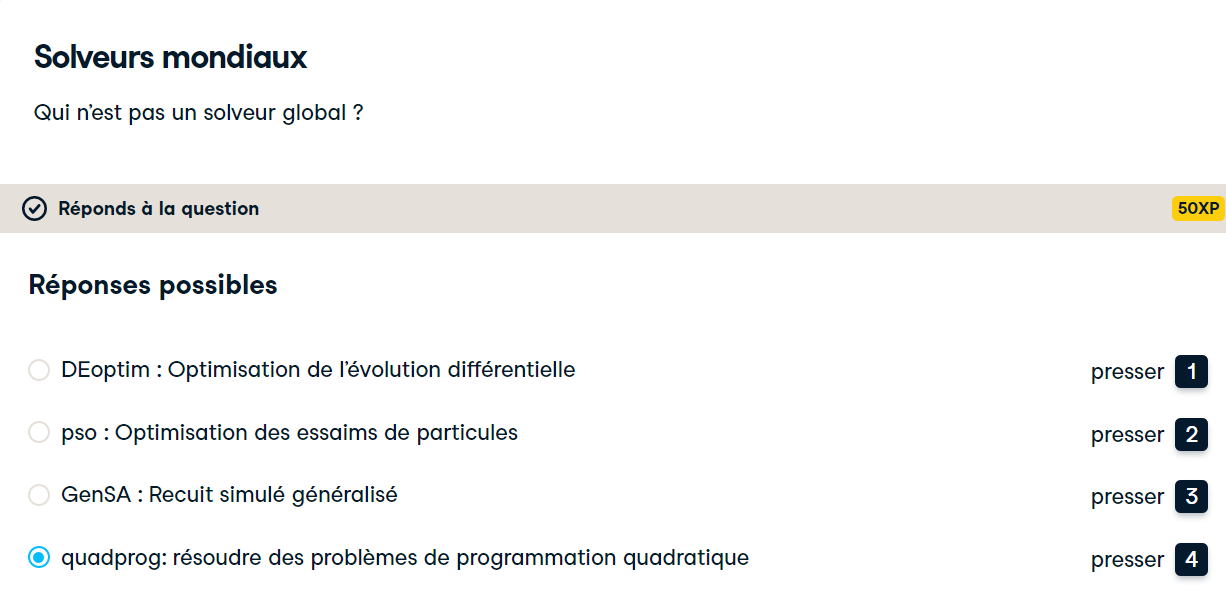

***Corriger! Quadprog est un solveur de programmation quadratique.***

###**Analyse des résultats d’optimisation**

####**1. Analyse des résultats d’optimisation**
+ ***Le package PortfolioAnalytics comprend plusieurs fonctions de visualisation et d’extraction des données des résultats d’optimisation.***

####**2. Flux de travail : analyser les résultats**
+ L’analyse est très importante pour comprendre et développer l’intuition du problème d’optimisation de portefeuille. 

+ **Les fonctions de visualisation et d’extraction sont conçues pour fonctionner indépendamment du solveur choisi malgré les différences de chaque solveur**. 

+ **Le tableau de cette diapositive répertorie les fonctions permettant de visualiser les résultats de l’optimisation et d’extraire les données importantes des résultats de l’optimisation**. 

+ Ces fonctions représenteront ou retourneront les données quel que soit le solveur utilisé, de sorte que vous n’avez pas nécessairement besoin de connaître les détails de la sortie renvoyée par chaque solveur. 

+ Les fonctions d’extraction sont utiles si vous souhaitez renvoyer les données sous forme d’objet xts ou de bloc de données pour une analyse plus approfondie ou un affichage dans une table. 

+ **Pour visualiser la sortie de l’optimisation, vous devez utiliser les fonctions graphiques. Les diapositives suivantes illustreront quelques-unes de ces fonctions.**

####**3. Exemple : extraire les poids**


+ Dans ce qui suit, nous allons passer en revue quelques fonctions pour analyser les résultats d’une optimisation de période unique et d’une optimisation avec rééquilibrage de période. 

+ Dans cet exemple, l’objet opt est la sortie de **optimize.portfolio** et l’objet opt_rebal est la sortie de **optimize.portfolio.rebalancing.**

####**4. Exemple : extraire les poids**
+ Notez que vous utilisez la même fonction pour extraire les poids optimaux des deux objets de sortie d’optimisation.

####**5. Exemple : extraire les poids**
+ Dans le cas de l’optimisation à période unique, un seul jeu de poids est renvoyé.

####**6. Exemple : extraire les poids**
+ Cependant, pour le cas de l’optimisation avec rééquilibrage, les pondérations optimales à chaque période de rééquilibrage sont renvoyées. 
+ La tête avec n égal à 3 est utilisée pour n’afficher ici que les 3 premières observations.

####**7. Exemple : pondérations des graphiques**
+ Vous pouvez visualiser les poids optimaux avec la fonction char.Weights. 

+ Tout comme l’extraction des poids, vous utilisez la même fonction pour tracer les poids d’une seule période ou l’optimisation avec rééquilibrage. 

+ Les poids optimaux pour chaque optimisation sont tracés à l’aide de la fonction chart.Weights. Notez que pour le cas de l’optimisation à période unique, un seul ensemble de poids est tracé.

####**8. Exemple : pondérations des graphiques**
+ Cependant, une série chronologique de poids optimaux à chaque période de rééquilibrage est tracée pour le backtest. 
+ L’extraction des mesures objectives fonctionne de la même manière que les poids optimaux.

####**9. Exemple : extraire des mesures objectives**

+ **Les mesures objectives sont les valeurs des objectifs du portefeuille optimal.** 
+ **Dans ce cas, vous avez un objectif dans la spécification du portefeuille, à savoir minimiser l’écart type du portefeuille**. 
+ **L’intuition est que c’est la valeur minimale de l’objectif trouvé par l’optimisation.** 
+ **Vous pouvez voir la valeur objective du portefeuille optimal pour l’optimisation à période unique ainsi qu’une série chronologique des valeurs objectives à chaque période de rééquilibrage pour l’optimisation avec rééquilibrage annuel.**

####**10. Exemple : analyse d’optimisation**

+ Vous pouvez calculer les rendements du portefeuille à l’aide de la fonction Return.portfolio. 

+ Vous devez transmettre les rendements des actifs et les pondérations optimales à chaque période de rééquilibrage, que vous obtenez avec la fonction extractWeights. 

+ Vous pouvez ensuite visualiser les rendements du portefeuille à l’aide de la fonction charts.PerformanceSummary. 

+ Le premier panneau affiche les rendements cumulés, le deuxième panneau est un diagramme à barres des rendements pour chaque période et le troisième panneau affiche les prélèvements. Un drawdown se produit chaque fois que le rendement cumulatif tombe en dessous du rendement cumulatif maximal.

####**11. Entraînons-nous!**
+ Passons à quelques exercices.

###**EXERCICES**

####**Valeurs de mesure objectives**

+ ***Cet exercice est la suite des derniers exercices analysant la sortie de opt et opt_rebal. Tous les objectifs de la spécification du portefeuille sont évalués lors de l'optimisation et les valeurs peuvent être extraites avec extractObjectiveMeasures(). Les mesures objectives sont une composante importante de la sortie d'optimisation à analyser. Un cas d'utilisation important examine le résultat de chaque itération/essai de l'optimiseur. Cela peut vous donner un aperçu de la façon dont l'optimiseur aborde la solution optimale et éventuellement ajuster les paramètres. Nous pouvons également analyser la distribution des valeurs objectives dans l'échantillon des portefeuilles optimaux et les comparer aux performances hors échantillon.***

####**Instructions**

+ Extrayez les mesures objectives pour l'optimisation sur une seule période.
+ Extraire les mesures objectives pour le backtest d'optimisation.

In [49]:
# Extract the objective measures for the single period optimization
print(extractObjectiveMeasures(opt))

$mean
       mean 
0.004265327 

$StdDev
$StdDev$StdDev
[1] 0.008988572

$StdDev$contribution
 Convertible Arbitrage             CTA Global  Distressed Securities 
          0.0010590432           0.0010411983           0.0010416617 
      Emerging Markets  Equity Market Neutral           Event Driven 
          0.0018035800           0.0004903910           0.0005022044 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
          0.0003724447           0.0005019871           0.0005084311 
      Merger Arbitrage         Relative Value          Short Selling 
          0.0002265651           0.0003761851           0.0005632955 
        Funds of Funds 
          0.0005015844 

$StdDev$pct_contrib_StdDev
 Convertible Arbitrage             CTA Global  Distressed Securities 
            0.11782108             0.11583578             0.11588735 
      Emerging Markets  Equity Market Neutral           Event Driven 
            0.20065257             0.05455717             0.

In [50]:
# Extract the objective measures for the optimization backtest
head(extractObjectiveMeasures(opt_rebal))

                  mean     StdDev StdDev.contribution.Convertible Arbitrage
2001-12-31 0.008891595 0.01173784                              0.0002047386
2002-03-31 0.008375729 0.01148016                              0.0002105604
2002-06-30 0.007984957 0.01158110                              0.0002128416
2002-09-30 0.006998459 0.01138388                              0.0002188405
2002-12-31 0.006772073 0.01122034                              0.0002227937
2003-03-31 0.006479819 0.01110271                              0.0002274672
           StdDev.contribution.CTA Global
2001-12-31                  -1.045258e-06
2002-03-31                  -5.513545e-06
2002-06-30                  -1.645232e-05
2002-09-30                  -4.285813e-05
2002-12-31                  -4.245388e-05
2003-03-31                  -3.696592e-05
           StdDev.contribution.Distressed Securities
2001-12-31                              0.0004831767
2002-03-31                              0.0004829369
2002-06-30     

***Bon! L'étude des mesures objectives d'un portefeuille rééquilibré peut donner un aperçu de son évolution au fil du temps.***

######**Poids optimaux**

+ ***Cet exercice est la suite des derniers exercices analysant la sortie de opt et opt_rebal. L'extraction et la visualisation des poids optimaux est un élément important de l'optimisation. Les poids optimaux peuvent être extraits avec extractWeights() et cartographiés avec chart.Weights(). Ceci est particulièrement utile pour les backtests pour comprendre l'évolution des poids dans le temps. Nous pouvons ensuite répondre aux questions sur la façon dont les allocations changent dans le temps.***

####**Instructions**

+ Extrayez les pondérations optimales pour l'optimisation d'une seule période.
+ Représentez graphiquement les pondérations pour l'optimisation à période unique.
+ Extraire les poids optimaux pour le backtest d'optimisation.
+ Tracez les pondérations pour le backtest d'optimisation.

In [52]:
# Extract the optimal weights for the single period optimization
print(extractWeights(opt))

 Convertible Arbitrage             CTA Global  Distressed Securities 
                  0.10                   0.10                   0.10 
      Emerging Markets  Equity Market Neutral           Event Driven 
                  0.10                   0.10                   0.05 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
                  0.05                   0.05                   0.05 
      Merger Arbitrage         Relative Value          Short Selling 
                  0.05                   0.05                   0.15 
        Funds of Funds 
                  0.05 


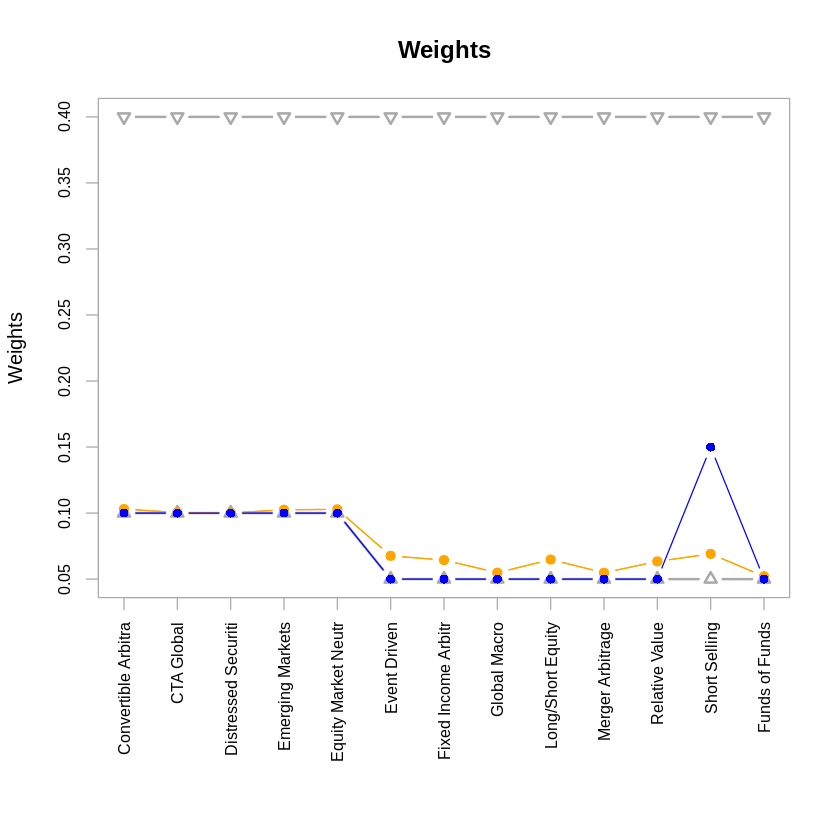

In [53]:
# Chart the weights for the single period optimization
chart.Weights(opt)

In [54]:
# Extract the optimal weights for the optimization backtest
head(extractWeights(opt_rebal))

           Convertible Arbitrage CTA Global Distressed Securities
2001-12-31            0.02814842 0.00780189            0.03175171
2002-03-31            0.02814842 0.00780189            0.03175171
2002-06-30            0.02814842 0.00780189            0.03175171
2002-09-30            0.02814842 0.00780189            0.03175171
2002-12-31            0.02814842 0.00780189            0.03175171
2003-03-31            0.02814842 0.00780189            0.03175171
           Emerging Markets Equity Market Neutral Event Driven
2001-12-31       0.03558725            0.05871233   0.04585716
2002-03-31       0.03558725            0.05871233   0.04585716
2002-06-30       0.03558725            0.05871233   0.04585716
2002-09-30       0.03558725            0.05871233   0.04585716
2002-12-31       0.03558725            0.05871233   0.04585716
2003-03-31       0.03558725            0.05871233   0.04585716
           Fixed Income Arbitrage Global Macro Long/Short Equity
2001-12-31              0.187994

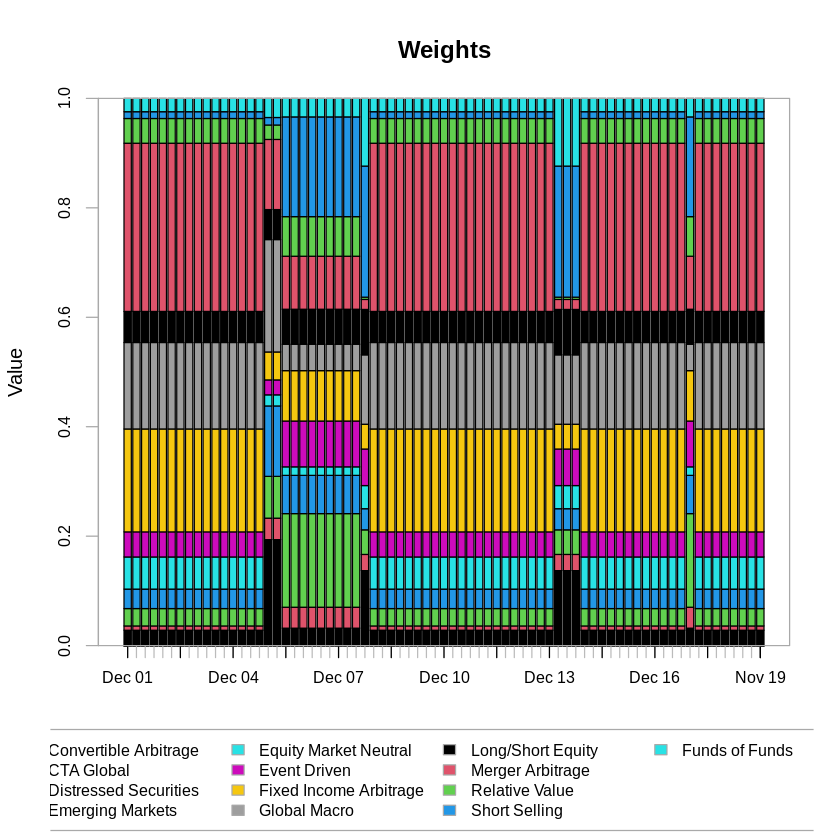

In [55]:
# Chart the weights for the optimization backtest
chart.Weights(opt_rebal)

***N'est-ce pas cool ? La visualisation des pondérations d'un portefeuille rééquilibré au fil du temps peut vous aider à identifier les problèmes potentiels dans votre modèle.***

###**Déclarations sur la restitution des actifs**

####**1. Déclarations sur la restitution des actifs**
+ ***Rappelez-vous le diagramme de la diapositive du chapitre 1 avec la représentation d’un cadre d’optimisation de portefeuille.***

####**2. Entrées d’optimisation**
+ **Les entrées du problème d’optimisation du portefeuille sont les actifs, les contraintes, les objectifs et les rendements des actifs**. 

+ **Généralement, l’univers des actifs, des contraintes et des objectifs est défini par le gestionnaire de portefeuille ou le mandat du fonds.** 

+ **Il n’y a pas d’incertitude dans ces intrants. Cependant, les moments de rendement des actifs doivent être estimés. En théorie, de meilleures estimations mènent à de meilleurs résultats. Il est important de comprendre que l’estimation des valeurs introduit une erreur d’estimation et un risque de modèle.**

####**3. Moments de rendement des actifs**

+ **Ce que j’appelle les moments de rendement des actifs sont les propriétés de la distribution des rendements des actifs. Le premier moment est le vecteur de retour attendu, le deuxième moment est la matrice variance-covariance, le troisième moment est la matrice de coasymétrie et le quatrième moment est la matrice de cokurtose.**

####**4. Moments de rendement des actifs**
+ **Les objectifs et les contraintes définis dans le problème du portefeuille déterminent quels moments doivent être estimés**. 

+ **Par exemple, un problème d’optimisation de portefeuille dans le cadre de variance moyenne pour maximiser le rendement moyen et minimiser l’écart-type du portefeuille nécessite des estimations pour le vecteur de rendements attendus et la matrice de covariance. Cependant, un problème pour minimiser la variance du portefeuille ne nécessite qu’une estimation de la matrice de covariance.**

####**5. Estimations du moment de rendement de l’actif**

+ Il existe de nombreuses recherches dans le domaine des différents modèles et méthodes d’estimation des moments de rendement des actifs pour l’optimisation du portefeuille et les modèles de risque. 

+ Dans leur article de 2003, Ledoit et Wolf affirment que la matrice de covariance de l’échantillon ne devrait pas être utilisée dans l’optimisation du portefeuille. 

+ Les méthodes d’estimation des moments comprennent, sans toutefois s’y limiter, les estimations d’échantillons, les estimateurs de retrait, les modèles factoriels, l’expression de points de vue et les techniques tirées de statistiques robustes. 

+ Les principaux inconvénients des estimations d’échantillon sont l’erreur d’estimation et la malédiction de la dimensionnalité. 

+ À titre d’exemple pour un portefeuille de 20 actifs, 210 éléments doivent être estimés pour l’échantillon de matrice de covariance. 

+ Les autres méthodes présentées ici tentent de résoudre les problèmes des estimations par échantillon en réduisant les erreurs d’estimation et en imposant une structure pour réduire le nombre de valeurs à estimer. Par exemple, un portefeuille de 20 actifs utilisant un modèle factoriel à 3 facteurs nécessite une estimation de 86 éléments pour la matrice de covariance. 

+ Les risques d’erreur d’estimation augmentent à mesure que la dimension des actifs et des paramètres à estimer augmente. 

+ **Dans ce cours, vous travaillerez sur les problèmes d’optimisation de portefeuille en utilisant un échantillon, un modèle factoriel et des statistiques robustes pour estimer les moments du portefeuille.**

####**6. Calcul des moments dans PortfolioAnalytics**

+ **Le progiciel PortfolioAnalytics prend en charge plusieurs méthodes de calcul des moments de rendement des actifs.** 

+ **Vous utiliserez la fonction set.portfolio.moments qui calcule les moments et prend en charge les méthodes suivantes** : 
  + sample, 
  + Boudt, 
  + Black-Litterman 
  + Meucci. 
  
+ Vous pouvez spécifier lequel utiliser avec l’argument de méthode. 

+ Le comportement par défaut consiste à utiliser des exemples d’estimations pour les moments. 

+ Les estimations par échantillon sont la méthode la plus élémentaire d’estimation des moments. 

+ **Des méthodes plus avancées incluent des modèles factoriels ou des modèles d’expression de points de vue tels que les modèles Black-Litterman ou Meucci**. 

+ **Vous apprendrez à définir les moments du portefeuille à l’aide d’estimations d’échantillons ainsi qu’avec un modèle factoriel statistique utilisant ce que nous appelons la méthode Boudt.**

####**7. Exemple : moments dans PortfolioAnalytics**

+ **Cette diapositive illustre l’utilisation de set.portfolio.moments avec le comportement par défaut ainsi qu’une technique plus avancée en spécifiant method = « boudt » pour calculer les moments de rendement des actifs.**

+ Pour cet exemple, vous êtes simplement intéressé par le calcul des moments pour en savoir plus sur la fonction set.portfolio.moments. 

+ Dans des exercices et des vidéos ultérieurs, vous apprendrez à les utiliser dans une optimisation. 

+ Cet exemple utilise les 4 premières colonnes des données edhec comme rendements de l’actif et une spécification de portefeuille dans le but de minimiser l’écart type du portefeuille. 

+ La fonction set-dot-portfolio-dot-moments nécessite les rendements des actifs, la spécification du portefeuille et les arguments facultatifs en fonction de la méthode de calcul des moments. 

+ Le comportement par défaut consiste à calculer les moments à l’aide de l’exemple de méthode, de sorte que vous n’avez qu’à transmettre les rendements des actifs et la spécification du portefeuille. 

+ La méthode de Boudt calcule les moments en ajustant un modèle de facteurs statistiques avec $k$ facteurs. 

+ *L’utilisation d’un modèle factoriel est un moyen d’imposer une structure à la matrice variance-covariance. Pour utiliser la méthode Boudt avec 1 facteur, vous appelez set.portfolio.moments et spécifiez method="boudt » et $k=1$.*

####**8. Exemple : moments dans PortfolioAnalytics**

+ Cette diapositive montre les résultats des estimations de la matrice variance-covariance à l’aide des deux méthodes de la diapositive précédente. 

+ La fonction set.portfolio.moments renvoie une liste nommée afin que vous puissiez extraire le deuxième moment avec le signe dollar sigma comme illustré dans la diapositive. 

+ Notez que pour les besoins de l’affichage sur la diapositive, les valeurs sont arrondies à 6 chiffres. 

+ Vous savez maintenant comment estimer les moments à l’aide de la méthode de l’exemple ainsi que de méthodes plus avancées. Vous savez également comment extraire ces estimations pour une analyse plus approfondie.

####**9. Entraînons-nous!**
+ Passons aux exercices.

###**EXERCICES**

####**Exemples d'estimations de moment**

+ ***La méthode par défaut pour estimer les moments du portefeuille est la méthode de l'échantillon. Les moments sont calculés dansoptimize.portfolio() en évaluant la fonction passée à l'argument momentFUN. La valeur par défaut pour momentFUN est set.portfolio.moments() qui calcule par défaut les exemples de moments. Les moments sont ensuite utilisés comme entrées des fonctions objectives. Les moments à estimer dépendent des objectifs. Par exemple, un objectif de minimisation de l'écart-type du portefeuille ne nécessite qu'une estimation du second moment. Comparez cela à l'objectif de maximiser le ratio de Sharpe qui nécessite que les premier et deuxième moments soient estimés. Les estimations d'échantillon des moments présentent des inconvénients, notamment une erreur d'estimation et la malédiction de la dimensionnalité. Il existe un risque accru d'erreur d'estimation à mesure que la dimension des actifs et des paramètres à estimer augmente.***

####**Instructions**

+ Ajoutez un objectif de rendement avec "moyenne" comme nom d'objectif.
+ Calculez les exemples de moments à l'aide de set.portfolio.moments. 

+ Affecter à une variable nommée moments.

+ Vérifiez si le premier moment est égal à l'estimation de l'échantillon des rendements moyens.

+ Ajoutez un objectif de risque avec "StdDev" comme nom d'objectif.

+ Calculez les exemples de moments à l'aide de set.portfolio.moments. 
+ Affecter à une variable nommée moments.

+ Vérifiez si le deuxième moment est égal à l'estimation de l'échantillon de la matrice variance-covariance.

In [56]:
# Add a return objective with "mean" as the objective name
port_spec <- add.objective(portfolio = port_spec, type = 'return', name = "mean")
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- long_only 
		- weight_sum 

Objectives:
Enabled objective names
		- mean 
		- StdDev 
		- StdDev 
		- mean 


In [57]:
# Calculate the sample moments
moments <- set.portfolio.moments(R = asset_returns, portfolio = port_spec)
moments

0.005500364
0.004158182
0.006621818
0.006245818
0.004356000
0.006216364
0.004266909
0.005377818
0.006260000
0.005292727
0.005701091


In [58]:
# Check if moments$mu is equal to the sample estimate of mean returns
moments$mu == colMeans(asset_returns)

TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


In [59]:
# Add a risk objective with "StdDev" as the objective name
port_spec <- add.objective(portfolio = port_spec, type = 'risk', name = 'StdDev')
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- long_only 
		- weight_sum 

Objectives:
Enabled objective names
		- mean 
		- StdDev 
		- StdDev 
		- mean 
		- StdDev 


In [60]:
# Calculate the sample moments using set.portfolio.moments. Assign to a variable named moments.
moments <- set.portfolio.moments(R = asset_returns, portfolio = port_spec)
moments

0.005500364
0.004158182
0.006621818
0.006245818
0.004356000
0.006216364
0.004266909
0.005377818
0.006260000
0.005292727
0.005701091


In [61]:
# Check if moments$sigma is equal to the sample estimate of the variance-covariance matrix
moments$sigma == cov(asset_returns)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
Convertible Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
CTA Global,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Distressed Securities,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Emerging Markets,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Equity Market Neutral,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Event Driven,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Fixed Income Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Global Macro,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Long/Short Equity,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Merger Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


***Les moments d'échantillonnage simples ne constituent pas toujours une bonne estimation. Regardons quelques autres méthodes pour estimer les moments.***

####**Estimations de moment avancées**

+ ***PortfolioAnalytics prend en charge la méthode "échantillon" ainsi que trois méthodes plus avancées pour estimer les moments de portefeuille.***

  + **"sample"**: Exemple d'estimation de base des quatre premiers moments.
  + **« boudt »** : les quatre premiers moments sont estimés en ajustant un modèle à facteurs statistiques basé sur les travaux de [Boudt et al., 2014](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2409603).
  + **"black_litterman"**: Les deux premiers moments sont estimés à l'aide du [cadre Black-Litterman](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1117574).
+ **"Meucci"**: Les deux premiers moments sont estimés à l'aide du [cadre des vues entièrement flexibles](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1213325).


+ *Dans cet exercice, vous allez estimer le deuxième moment en utilisant la méthode "boudt". Un objet de spécification de portefeuille nommé port_spec avec un objectif "StdDev" a déjà été créé.*

####**Instructions**

+ Imprimez l'objet de spécification de portefeuille.
+ Ajuster un modèle factoriel statistique avec 3 facteurs aux rendements des actifs. Affecter à une variable nommée fit
+ Estimez les moments du portefeuille en utilisant la méthode "boudt" avec 3 facteurs. Affecter à une variable nommée moments_boudt.
+ Utilisez extractCovariance() pour obtenir la matrice de variance-covariance estimée à partir de fit et vérifiez si elle est égale à l'estimation en moments_boudt

In [62]:
# Print the portfolio specification object
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = asset_names)

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- long_only 
		- weight_sum 

Objectives:
Enabled objective names
		- mean 
		- StdDev 
		- StdDev 
		- mean 
		- StdDev 



In [63]:
# Fit a statistical factor model to the asset returns
fit <- statistical.factor.model(R = asset_returns, k = 3)

# Estimate the portfolio moments using the "boudt" method with 3 factors
moments_boudt <- set.portfolio.moments(R = asset_returns, portfolio = port_spec, method = "boudt", k = 3)

# Check if the covariance matrix extracted from the model fit is equal to the estimate in `moments_boudt`
moments_boudt$sigma == extractCovariance(fit)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
Convertible Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
CTA Global,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Distressed Securities,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Emerging Markets,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Equity Market Neutral,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Event Driven,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Fixed Income Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Global Macro,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Long/Short Equity,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Merger Arbitrage,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


***Super! Certains des pièges des moments d'échantillonnage sont évités en utilisant ces autres méthodes d'estimation. Vérifiez-les certainement!***

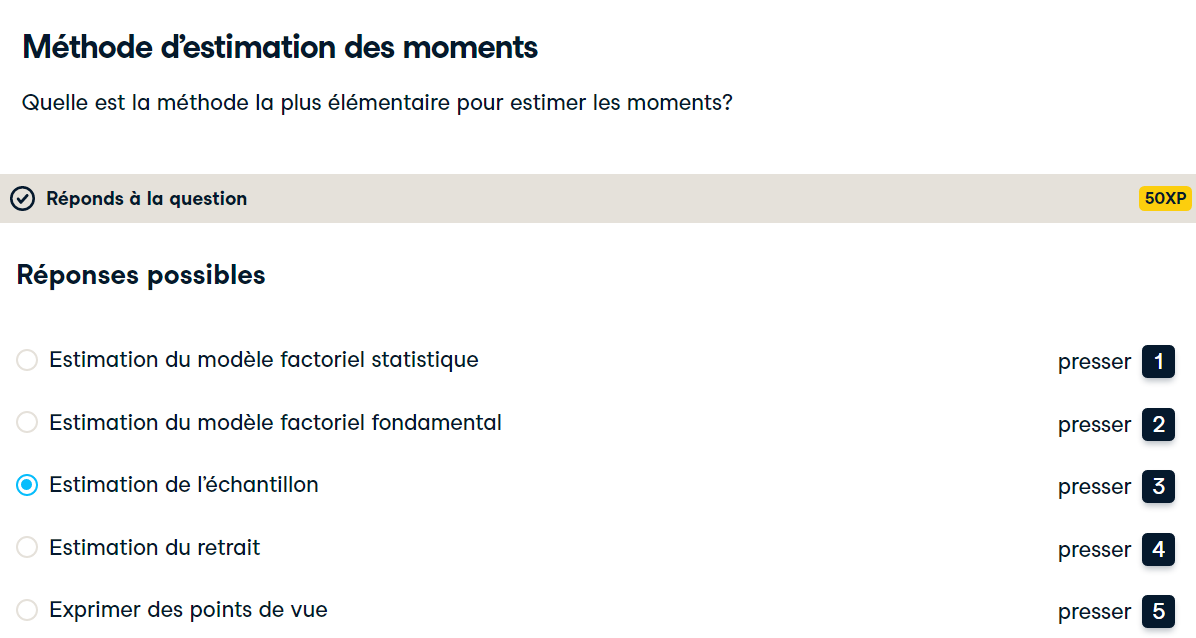

***Corriger! L’utilisation d’un échantillon d’estimation est le moyen le plus élémentaire d’estimer les moments, mais peut Soyez assez restrictif!***

####**Fonctions de moment personnalisées**

####**1. Fonctions de moment personnalisées**
+ Comme vous l’avez appris dans la vidéo précédente, il existe plusieurs méthodes et techniques différentes pour estimer les moments.

####**2. Fonctions de moment personnalisées**

+ Bien que PortfolioAnalytics prenne en charge plusieurs méthodes d’estimation des moments, il n’est pas possible ou possible de prendre en charge toutes les méthodes et tous les modèles, de sorte que le package prend en charge les fonctions de moment personnalisées. 

+ Une fonction de moment personnalisé est une fonction définie par l’utilisateur qui est une fonction R valide. 

+ Il existe quelques instructions à suivre pour nommer les arguments et le type d’objet qui doit être retourné. 

+ La fonction doit accepter un argument R pour les rendements de l’actif, portefeuille pour l’objet de spécification de portefeuille. 

+ Tous les autres arguments nommés spécifiques à l’estimation des moments peuvent être utilisés. 

+ La fonction doit renvoyer une liste nommée où les éléments de la liste représentent les moments. 

+ Ceci est important car les routines d’optimisation dans PortfolioAnalytics attendent les estimations de moment représentées dans ce format.

####**3. Exemple : fonction de moment personnalisé**
+ Dans cet exemple, vous allez définir une fonction de moment personnalisée pour estimer la matrice variance-covariance à l’aide d’un estimateur robuste. Le package MASS a la fonction cov-dot-rob qui prend en charge les méthodes « mve » et « mcd » pour une estimation robuste de la matrice variance-covariance. « MVE » signifie ELLIPSOID de volume minimum et « MCD » signifie déterminant de covariance minimale. 

+ Intuitivement, cela estime la covariance de la « bonne » partie des données et diminue l’impact des valeurs aberrantes. 

+ En suivant les instructions de la diapositive précédente, vous définissez la fonction pour accepter les arguments R et portfolio. 

+ En outre, vous souhaitez également pouvoir spécifier la méthode pour cov-dot-rob afin d’ajouter également un argument rob_method. 

+ Vous remarquerez que l’argument portfolio n’est pas utilisé dans cette fonction de moment personnalisé. 

+ Dans certains cas, vous souhaiterez peut-être utiliser les informations de la spécification de portefeuille dans votre fonction de moment personnalisé afin qu’elles soient disponibles si vous souhaitez les utiliser. 

+ Cette fonction de moment personnalisé estime uniquement la matrice variance-covariance, le deuxième moment, de sorte que vous renvoyez une liste nommée avec « sigma ». 

+ Vous utilisez la fonction de moment personnalisé dans l’optimisation en spécifiant le nom de votre fonction personnalisée pour l’argument momentFUN dans optimize-dot-portfolio. 

+ Vous pouvez également transmettre l’argument nommé, par exemple rob_method = « mcd », pour spécifier la méthode utilisée pour estimer la matrice variance-covariance.

####**4. Entraînons-nous!**
+ Passons aux exercices.

###**EXERCICES**

####**Définir une fonction de moment personnalisée**

+ ***Dans de nombreux cas, pour des problèmes d'optimisation sous contrainte, le gestionnaire de portefeuille ou l'analyste peut souhaiter estimer les moments d'une technique spécifique et/ou étendre davantage l'idée de set.portfolio.moments(). Une fonction de moment personnalisée définie par l'utilisateur peut avoir n'importe quel argument nommé arbitraire. Cependant, les arguments nommés R pour les rendements des actifs et portefeuille pour l'objet portefeuille seront détectés automatiquement et traités de manière efficace. De ce fait, il est fortement conseillé d'utiliser R pour l'objet retours d'actifs et portefeuille pour l'objet portefeuille.***

+ **La fonction de moment personnalisée doit renvoyer une liste nommée où les éléments représentent les moments :**

  + $mu : premier instant (vecteur de retours attendus)

  + $sigma : deuxième moment (matrice variance-covariance)

  + $m3 : troisième moment (matrice d'asymétrie)

  + $m4 : quatrième moment (matrice de cokurtose)


+ *Dans cet exercice, vous allez écrire une fonction de moment personnalisée pour estimer la matrice variance-covariance à l'aide d'une méthode robuste. Nous allons utiliser la fonction cov.rob() du package MASS. La signature de la fonction doit avoir des arguments nommés R pour les rendements des actifs et portefeuille pour l'objet de spécification. La fonction doit renvoyer une liste nommée. Étant donné que vous n'estimez que le deuxième moment, vous n'avez qu'à renvoyer une liste avec un élément nommé de manière appropriée. Vous pouvez appliquer ces règles pour écrire des fonctions de moment personnalisées pour d'autres modèles tels que les modèles factoriels, les modèles GARCH ou toute autre classe de modèles qui, en théorie, devraient être une meilleure estimation que l'estimation de l'échantillon.*

####**Instructions**

+ Définissez une fonction nommée moments_robust qui estime la matrice variance-covariance des rendements des actifs à l'aide de la méthode "mcd".
+ Estimez les moments du portefeuille que vous venez de définir. 
+ Affectez-le à une variable nommée moments. 
+ Vous faites cela pour vérifier que votre fonction de moment personnalisé fonctionne comme prévu.
+ Calculez la matrice variance-covariance directement à l'aide de cov.rob() et vérifiez si elle est égale à moments$sigma

In [64]:
# Define custom moment function
moments_robust <- function(R, portfolio){
  out <- list()
  out$sigma <- cov.rob(R, method = "mcd")$cov
  out
}

# Estimate the portfolio moments using the function you just defined 
moments <- moments_robust(R = asset_returns, portfolio = port_spec)

# Check the moment estimate
cov.rob(asset_returns, method = "mcd")$cov == moments$sigma

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
Convertible Arbitrage,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
CTA Global,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Distressed Securities,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Emerging Markets,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Equity Market Neutral,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Event Driven,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Fixed Income Arbitrage,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Global Macro,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Long/Short Equity,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
Merger Arbitrage,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


***Bon! N'oubliez pas que vous pouvez créer n'importe quelle fonction de moment personnalisée valide que vous souhaitez !***

####**Optimisation avec fonction de moment personnalisée**

+ ***Nous aimerions maintenant exécuter l'optimisation à l'aide de notre fonction de moment personnalisée. Rappelez-vous que les moments du portefeuille sont définis dansoptimize.portfolio() lorsque la fonction de moment est évaluée. Nous utilisons la fonction moment personnalisée en transmettant le nom à l'argument momentFUN dansoptimize.portfolio(). Notez comment nous pouvons utiliser PortfolioAnalytics pour exécuter facilement des optimisations à l'aide de différentes méthodes d'estimation des moments, ce qui nous permettra d'évaluer différentes techniques d'estimation des moments et d'affiner ces estimations en analysant les résultats de l'optimisation.***

####**Instructions**

+ Un objet de spécification de portefeuille, port_spec, et une fonction de moment personnalisée, moments_robust(), ont déjà été créés pour être utilisés avec cet exercice.

+ Exécutez l'optimisation avec les estimations de moment personnalisées. Affectez-le à une variable nommée opt_custom.
+ Imprimez la sortie de opt_custom.
+ Exécutez l'optimisation avec des exemples d'estimations de moment. 
+ Affectez-le à une variable nommée opt_sample.
+ Imprimez la sortie de opt_sample.

In [65]:
# Create the portfolio specification
port_spec <- portfolio.spec(colnames(asset_returns))

# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio =port_spec, type = "full_investment")

# Add a long only constraint such that the weight of an asset is between 0 and 1
port_spec <- add.constraint(portfolio = port_spec, type = "long_only")

# Add an objective to minimize portfolio standard deviation
port_spec <- add.objective(portfolio = port_spec, type = "risk", name = "StdDev")

In [66]:
rp <- random_portfolios(portfolio=port_spec,
                        permutations = 50,
                        rp_method='sample')

In [67]:
# Run the optimization with custom moment estimates
opt_custom <- optimize.portfolio(R = asset_returns, portfolio = port_spec, optimize_method = "random", rp = rp, momentFUN = "moments_robust")

# Print the results of the optimization with custom moment estimates
print(opt_custom)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01



***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", rp = rp, momentFUN = "moments_robust")

Optimal Weights:
 Convertible Arbitrage             CTA Global  Distressed Securities 
                 0.024                  0.004                  0.090 
      Emerging Markets  Equity Market Neutral           Event Driven 
                 0.048                  0.006                  0.136 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
                 0.110                  0.096                  0.132 
      Merger Arbitrage         Relative Value          Short Selling 
                 0.042                  0.110                  0.102 
        Funds of Funds 
                 0.100 

Objective Measures:
  StdDev 
0.007246 





In [68]:
# Run the optimization with sample moment estimates
opt_sample <- optimize.portfolio(R = asset_returns, portfolio = port_spec, optimize_method = "random", rp = rp)

# Print the results of the optimization with sample moment estimates
print(opt_sample)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01



***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", rp = rp)

Optimal Weights:
 Convertible Arbitrage             CTA Global  Distressed Securities 
                0.0769                 0.0769                 0.0769 
      Emerging Markets  Equity Market Neutral           Event Driven 
                0.0769                 0.0769                 0.0769 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
                0.0769                 0.0769                 0.0769 
      Merger Arbitrage         Relative Value          Short Selling 
                0.0769                 0.0769                 0.0769 
        Funds of Funds 
                0.0769 

Objective Measures:
  StdDev 
0.009955 





***Bon! Il semble que notre fonction de moment personnalisée ait un écart type inférieur à celui de la méthode d'échantillonnage.***

###**Fonctions objectives**

####**1. Fonctions objectives**
+ Les fonctions objectives calculent la valeur objective que l’optimiseur peut optimiser ou réduire.

####**2. Fonctions objectives**
+ Dans les problèmes d’optimisation de portefeuille, les fonctions objectives courantes sont le risque, le rendement, l’utilité et les mesures de performance relative de référence. 

+ Dans le package PortfolioAnalytics, les fonctions objectives peuvent être n’importe quelle fonction R valide. 

+ PortfolioAnalytics a été conçu pour s’intégrer au progiciel PerformanceAnalytics afin d’utiliser son large éventail de fonctions de risque, de rendement et de performance. 

+ Par exemple, lorsque vous ajoutez un objectif avec name="StdDev », vous spécifiez cette fonction à partir de PerformanceAnalytics à utiliser comme fonction d’objectif. 

+ L’objectif de risque le plus courant que vous utiliserez dans le cours est StdDev, qui calcule l’écart-type du portefeuille. 

+ Une autre mesure de risque courante dans l’optimisation du portefeuille est le déficit attendu qui est calculé avec la fonction SE. 

+ Bien que ce cours se concentre sur les mesures de risque pour les portefeuilles, si vous êtes préoccupé par la performance par rapport à un indice de référence, vous pouvez également inclure des mesures relatives de référence en tant que fonctions objectives.

####**3. Fonctions d’objectif personnalisées**
+ Rappelons qu’une fonction objective n’est qu’une fonction R valide. 

+ Cela signifie que des fonctions personnalisées, définies par l’utilisateur, peuvent être utilisées comme fonctions objectives. 

+ Bien que le progiciel PerformanceAnalytics prenne en charge un grand nombre de mesures du rendement, un gestionnaire de portefeuille ou un analyste peut souhaiter utiliser ses propres fonctions exclusives comme fonctions objectives. 

+ Il existe quelques lignes directrices pour définir une fonction d’objectif personnalisée. 

+ Les arguments de fonction doivent être nommés R pour les rendements des actifs, pondérations pour les pondérations du portefeuille et mu, sigma, m3, m4 pour le premier, deuxième, troisième et quatrième moment de rendement des actifs, respectivement. 

+ Ces noms d’arguments spécifiques sont mis en correspondance automatiquement et gérés de manière efficace. Comme c’est la norme pour les optimiseurs, la fonction objectif doit renvoyer une valeur unique.

####**4. Exemple : fonction d’objectif personnalisée**

+ Ici, vous commencez par définir une fonction pour calculer le ratio de Sharpe annualisé. 

+ **Le ratio de Sharpe est une mesure du rendement ajusté au risque et est calculé en divisant le rendement annualisé du portefeuille excédentaire par l’écart-type annualisé du portefeuille**. 

+ Vous suivez les instructions en utilisant R pour les rendements, les poids pour les poids et sigma pour le deuxième moment. 

+ Vous avez besoin de deux arguments supplémentaires, l’échelle pour l’annualisation et rfr pour le taux sans risque. 

+ Étant donné que le rendement du portefeuille est annualisé, le taux sans risque devrait également être annualisé. 

+ Tout d’abord, vous calculez le rendement annualisé du portefeuille, puis soustrayez le taux sans risque pour obtenir le rendement annualisé excédentaire. 

+ Ensuite, vous calculez la variance du portefeuille qui est la transposition des pondérations multipliées par la matrice variance-covariance, sigma, multipliée par les pondérations. La racine carrée de la variance est l’écart type, vous devez donc prendre la racine carrée de la variance et la multiplier par la racine carrée de l’argument d’échelle, par exemple 12 pour les rendements mensuels, pour calculer l’écart-type annualisé du portefeuille. 

+ Enfin, vous calculez le ratio de Sharpe annualisé en divisant le rendement excédentaire annuel du portefeuille par l’écart-type annuel du portefeuille.

####**5. Exemple : fonction d’objectif personnalisée**

+ Ensuite, nous chargeons le jeu de données edhec où nous n’utiliserons que les quatre premières colonnes pour cet exemple de problème. 

+ Nous créons la spécification de portefeuille avec un investissement complet et des contraintes longues seulement. 

+ Nous ajoutons la fonction objectif et spécifions le nom de notre fonction d’objectif personnalisée comme argument de nom. 

+ Nous spécifions type="return » car nous voulons maximiser la mesure objective. 

+ Nous devons spécifier scale=12 et rfr=0-point-02 comme liste nommée pour les arguments supplémentaires à passer à la fonction objectif.

####**6. Entraînons-nous!**
+ Maintenant, pratiquons ce que vous venez d’apprendre.

###**EXERCICES**

####**Fonction objectif personnalisée**

+ ***Une caractéristique clé de PortfolioAnalytics est que le nom d'un objectif est une fonction R valide. Le package a été conçu pour être flexible et modulaire, et les fonctions d'objectif personnalisées en sont un excellent exemple. Quelques directives doivent être suivies pour définir une fonction de moment personnalisée :***

  + La fonction d'objectif doit renvoyer une valeur unique pour que l'optimiseur minimise ou maximise.
  + Il est fortement recommandé d'utiliser R pour les rendements des actifs et les pondérations pour les pondérations du portefeuille.

+ *Ces noms d'arguments sont détectés automatiquement et gérés de manière efficace. Tous les autres arguments de la fonction objective peuvent être passés sous forme de liste nommée aux arguments de la fonction add.objective().*

####**Instructions**

+ Définissez une fonction d'objectif personnalisée pour calculer l'écart type annualisé du portefeuille.

In [69]:
# Custom annualized portfolio standard deviation
pasd <- function(R, weights, sigma, scale = 12){
  sqrt(as.numeric(t(weights) %*% sigma %*% weights)) * sqrt(scale)
}

***Bon! Comment l'utiliseriez-vous pour optimiser votre portefeuille ? Découvrons-le!***

####**Optimisation avec fonction d'objectif personnalisée**

+ ***Cet exercice s'appuie sur l'exercice précédent et nous exécuterons l'optimisation avec la fonction d'objectif personnalisée qui calcule l'écart type annualisé du portefeuille. Comme une fonction objectif peut être n'importe quelle fonction R valide, nous ajoutons un objectif de risque pour la fonction pasd(). La fonction set.portfolio.moments() ne reconnaîtra pas le nom de l'objectif pasd(), nous devons donc créer une fonction de moment personnalisée pour calculer le deuxième moment, sigma. Nous allons résoudre le problème en utilisant des portefeuilles aléatoires comme méthode d'optimisation.***

####**Instructions**

+ Ajoutez la fonction d'objectif personnalisée que vous avez créée dans l'exercice précédent à l'objet de spécification de portefeuille.
+ Imprimez l'objet de spécification de portefeuille pour voir les contraintes et l'objectif.
+ Exécutez l'optimisation. Le nom de la fonction de moment personnalisée est set_sigma.
+ Imprimer les résultats de l'optimisation.


In [70]:
set_sigma <- function(R){
  out <- list()
  out$sigma <- cov(R)
  out
}

In [71]:
# Create the portfolio specification
port_spec <- portfolio.spec(colnames(asset_returns))

# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio =port_spec, type = "full_investment")

# Add a long only constraint such that the weight of an asset is between 0 and 1
port_spec <- add.constraint(portfolio = port_spec, type = "long_only", )

In [72]:
rp <- random_portfolios(portfolio=port_spec,
                        permutations = 40,
                        rp_method='simplex')

In [73]:
# Add custom objective to portfolio specification
port_spec <- add.objective(portfolio = port_spec, type = 'risk', name = 'pasd')

# Print the portfolio specificaton object
print(port_spec)

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(asset_returns))

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- full_investment 
		- long_only 

Objectives:
Enabled objective names
		- pasd 



In [74]:
# Run the optimization
opt <- optimize.portfolio(R = asset_returns, portfolio = port_spec, momentFUN = set_sigma, optimize_method = "random", rp = rp)

# Print the results of the optimization
print(opt)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01



***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", rp = rp, momentFUN = set_sigma)

Optimal Weights:
 Convertible Arbitrage             CTA Global  Distressed Securities 
                0.0065                 0.0214                 0.0000 
      Emerging Markets  Equity Market Neutral           Event Driven 
                0.0000                 0.9357                 0.0000 
Fixed Income Arbitrage           Global Macro      Long/Short Equity 
                0.0000                 0.0001                 0.0000 
      Merger Arbitrage         Relative Value          Short Selling 
                0.0000                 0.0000                 0.0358 
        Funds of Funds 
                0.0005 

Objective Measures:
   pasd 
0.02546 





***Fantastique! Vous avez appris pas mal de choses jusqu'à présent. Il est temps de voir si vous pouvez appliquer vos nouvelles connaissances !***

###**Exemple concret**

####**1. Exemple concret**
+ ***Dans le quatrième et dernier chapitre du cours, vous appliquerez ce que vous avez appris dans les 3 premiers chapitres pour résoudre un problème qui imite un exemple du monde réel.**

####**2. Exemple concret**

+ **Vous passerez en revue chaque étape du problème où vous spécifiez un portefeuille, exécutez l’optimisation avec un rééquilibrage périodique, analysez les résultats de l’optimisation et apportez des améliorations dans le but d’améliorer la performance ajustée au risque du portefeuille.** 

+ **Vous assumerez le rôle d’un analyste chargé de construire un portefeuille de stratégies de hedge funds avec différentes définitions de style.** 

+ Les exercices de ce chapitre vous guideront à travers la construction du portefeuille et l’analyse historique du rendement. 

+ Le jeu de données que vous utiliserez dans l’exercice est constitué des rendements mensuels de janvier 1997 à mars 2016 des indices EDHEC-Risk Alternative. 

+ Bien que vous ne puissiez pas investir directement dans cet indice, il a été choisi pour représenter l’investissement dans des hedge funds avec différents styles. Ce problème est très similaire aux types de projets auxquels participerait un analyste ou un gestionnaire de portefeuille d’un fonds de fonds ou d’une grande banque.

####**3. Indice de référence**

+ **La définition d’un indice de référence est importante pour mesurer avec précision la performance relative de votre portefeuille**. 

+ Par exemple, si l’univers d’actifs du portefeuille est constitué d’actions américaines à grande capitalisation, un choix très raisonnable d’indice de référence est le S&P 500. 

+ Il est également courant que l’indice de référence soit établi en fonction du mandat du fonds. 

+ Cependant, il peut y avoir des cas où il n’existe pas d’indice de référence accessible au public qui soit raisonnable pour votre problème de portefeuille et il est utile d’avoir la possibilité de construire votre propre indice de référence personnalisé. 

+ L’exemple de cette diapositive crée un benchmark de poids égal des 4 premières colonnes du jeu de données d’index. 

+ Les quatre premières colonnes de l’ensemble de données représentent les rendements des obligations américaines, des actions américaines, des actions internationales et des matières premières. 

+ Une approche raisonnable pour l’indice de référence personnalisé est la pondération égale avec le rééquilibrage annuel. 

+ L’intuition pour une pondération égale est que vous n’avez aucune préférence pour aucun des actifs de l’univers, vous attribuez donc à chacun d’eux un poids égal. 

+ Vous pouvez ensuite calculer des mesures de performance telles que le rendement annualisé et l’écart-type annualisé de votre indice de référence personnalisé.

####**4. Définition du portefeuille de base**

+ **Vous commencerez par une approche très simple pour définir le problème d’optimisation avec la spécification de portefeuille de base, puis vous formulerez des hypothèses sur les moyens d’améliorer la performance ajustée au risque du portefeuille en affinant les contraintes, les objectifs et les estimations de moments dans les exercices ultérieurs**. 

+ **La spécification de base du portefeuille est de minimiser l’écart-type du portefeuille sous réserve d’un investissement total et de contraintes de long seulement**. 

+ **Dans cette diapositive, vous pouvez voir qu’une spécification de portefeuille est créée à l’aide des données de rendement définies dans la diapositive précédente avec des contraintes d’investissement complet et de long seulement et un objectif de minimiser l’écart type du portefeuille.** 

+ **Dans les exercices à venir, vous effectuerez une optimisation avec un rééquilibrage périodique pour obtenir la performance historique du portefeuille de base. La définition des paramètres de rééquilibrage dépend du problème spécifique et des données disponibles.**

####**5. Entraînons-nous!**
+ Passons aux exercices et commençons par le problème de l’application.

###**EXERCICES**

####**Calculer les rendements de référence**

+ ***Dans cet exercice, nous allons créer un benchmark pour évaluer les performances des modèles d'optimisation dans les exercices ultérieurs. Un indice de référence à pondération égale est un schéma de pondération simple pour construire le portefeuille de référence. L'intuition d'une approche à pondération égale est qu'il n'y a pas de préférence pour un actif donné. Nous mettons cela en place pour répondre à la question : "L'optimisation peut-elle surpasser un schéma de pondération simple pour construire un portefeuille ?"***

####**Instructions**

+ Chargez le package PortfolioAnalytics.
+ Chargez le jeu de données edhec.
+ Affectez le jeu de données edhec à une variable nommée asset_returns.
+ Créez un vecteur de poids égaux attribué à une variable nommée equal_weights.
+ Calculez un indice de référence à pondération égale, rééquilibré tous les trimestres, des rendements des actifs.
+ Tracez les rendements de référence.

In [75]:

# Load the package
library(PortfolioAnalytics)

# Load the data
data(edhec)

# Assign the data to a variable
asset_returns <- edhec

# Create a vector of equal weights
equal_weights <- rep(1 / ncol(asset_returns), ncol(asset_returns))

# Compute the benchmark returns
r_benchmark <- Return.portfolio(R = asset_returns, weights = equal_weights, rebalance_on = "quarters")
colnames(r_benchmark) <- "benchmark"

head(r_benchmark)

             benchmark
1997-01-31 0.026223077
1997-02-28 0.017237848
1997-03-31 0.004336202
1997-04-30 0.004353846
1997-05-31 0.013622743
1997-06-30 0.020753400

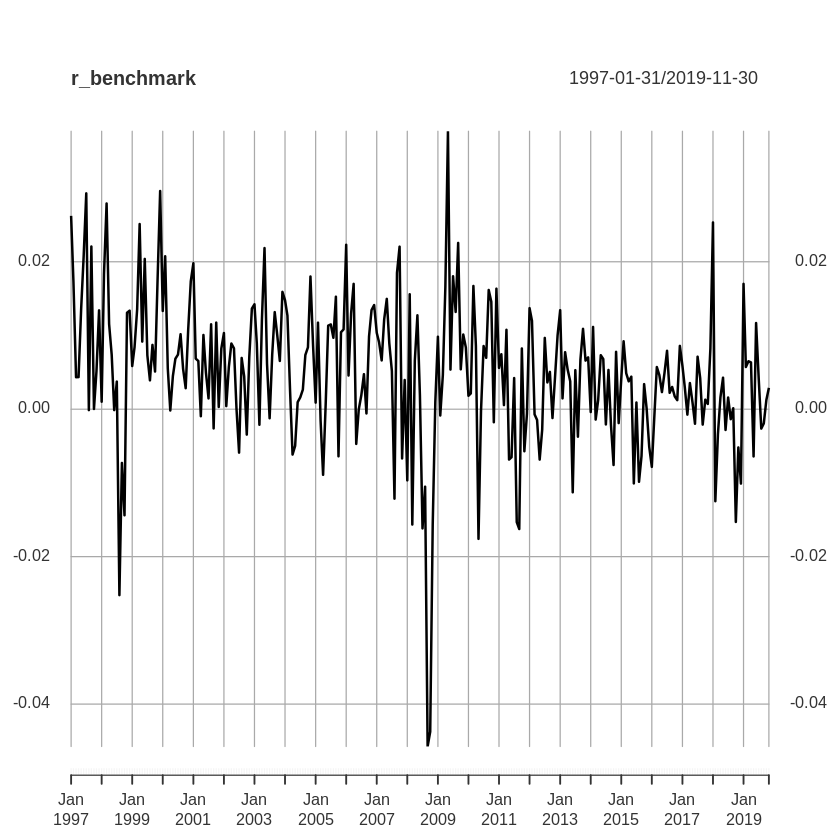

In [76]:
# Plot the benchmark returns
plot(r_benchmark)

***Super! Un bon indice de référence est essentiel pour connaître les performances de votre portefeuille.***

####**Définir le problème d'optimisation de portefeuille**

+ ***Nous définissons le problème d'optimisation de portefeuille pour minimiser l'écart-type du portefeuille soumis à un investissement complet et à des contraintes longues uniquement. Dans ce problème, nous allons mettre en place la spécification du portefeuille en fonction du problème défini. Les exercices suivants de ce chapitre s'appuieront sur la spécification initiale du portefeuille établie ici.***

####**Instructions**

+ Créez un objet de spécification de portefeuille à l'aide des actifs de l'ensemble de données asset_returns et nommez l'objet de spécification de portefeuille port_spec.
+ Ajoutez une contrainte d'investissement complète de sorte que les pondérations totalisent 1 à l'objet port_spec.
+ Ajoutez une contrainte longue uniquement telle que le poids d'un actif soit compris entre 0 et 1 à l'objet port_spec.
+ Ajoutez un objectif pour minimiser l'écart type du portefeuille à l'objet port_spec.
+ Imprimez l'objet de spécification de portefeuille.

In [77]:

# Create the portfolio specification
port_spec <- portfolio.spec(colnames(asset_returns))

# Add a full investment constraint such that the weights sum to 1
port_spec <- add.constraint(portfolio = port_spec, type = "full_investment")

# Add a long only constraint such that the weight of an asset is between 0 and 1
port_spec <- add.constraint(portfolio = port_spec, type = "long_only")

# Add an objective to minimize portfolio standard deviation
port_spec <- add.objective(portfolio = port_spec, type = "risk", name = "StdDev")

# Print the portfolio specification
print(port_spec)


**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = colnames(asset_returns))

Number of assets: 13 
Asset Names
 [1] "Convertible Arbitrage"  "CTA Global"             "Distressed Securities" 
 [4] "Emerging Markets"       "Equity Market Neutral"  "Event Driven"          
 [7] "Fixed Income Arbitrage" "Global Macro"           "Long/Short Equity"     
[10] "Merger Arbitrage"      
More than 10 assets, only printing the first 10

Constraints
Enabled constraint types
		- full_investment 
		- long_only 

Objectives:
Enabled objective names
		- StdDev 



**Bon! C'est une excellente spécification de port pour construire des modèles plus compliqués.**

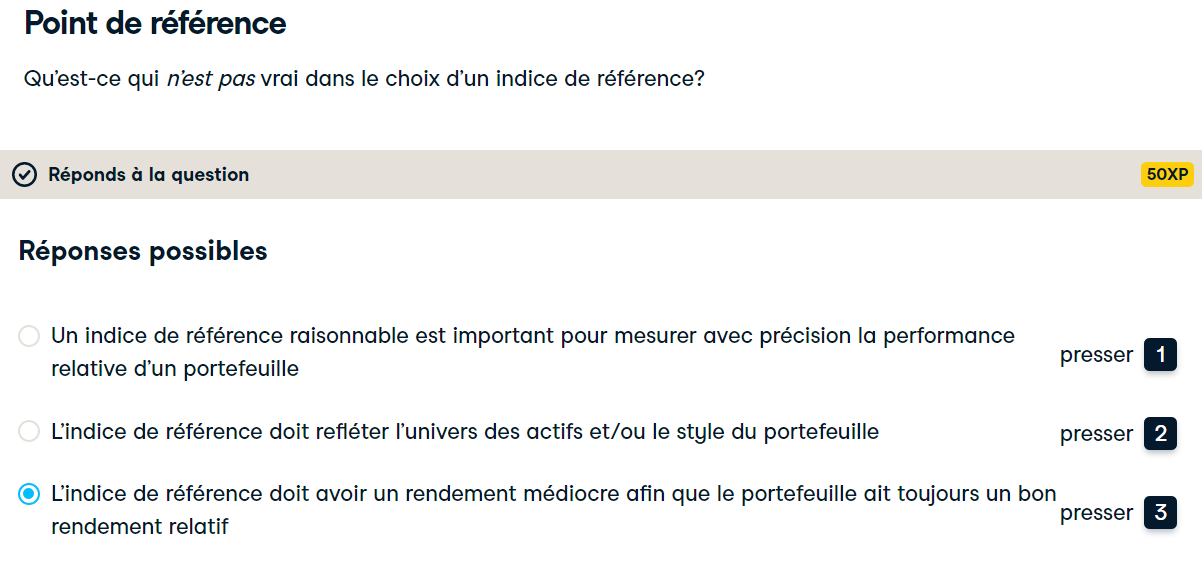

***Corriger! Les benchmarks ne devraient jamais être délibérément conçus pour avoir de mauvaises performances, car cela fausserait vos résultats!***

###**Backtest d’optimisation**

####**1. Backtest d’optimisation**
+ ***Cet exemple reprend là où les diapositives de la première vidéo se sont arrêtées.***

####**2. Backtest d’optimisation : exécution**

+ Vous utiliserez les rendements et la spécification de portefeuille de base des diapositives de la première vidéo de ce chapitre. 

+ Maintenant que vous avez défini une spécification de portefeuille de base, l’étape suivante consiste à exécuter l’optimisation avec un rééquilibrage périodique. 

+ Pour cet exemple, vous exécutez l’optimisation avec un rééquilibrage trimestriel en utilisant 5 ans de données pour la période de formation initiale et la fenêtre de roulement. 

+ Rappelez-vous que les données de déclaration que vous utilisez sont des déclarations mensuelles, 12 mois par an fois 5 ans est 60 périodes. 

+ Ensuite, vous pouvez extraire les pondérations optimales à chaque période de rééquilibrage avec extractWeights et passer les pondérations et les rendements dans Return.Portfolio pour calculer les rendements historiques.

####**3. Backtest d’optimisation : analyse**
+ Examinons de plus près la série chronologique des pondérations optimales et représentons-les afin de visualiser comment les pondérations du portefeuille changent au fil du temps. 

+ Vous pouvez voir dans le graphique que l’allocation aux obligations américaines, représentée en noir, est très élevée pendant toute la période du backtest. 

+ La pondération minimale allouée aux obligations américaines est légèrement inférieure à 60 % pendant les premières années du backtest, puis augmente à plus de 80 % dans les années 1990 avant de retomber sous la barre des 80 % au début des années 2000, puis de remonter à près de 100 % à la fin des années 2000 à la fin de la période de backtest. 

+ Pendant les 10 premières années du backtest, l’allocation aux obligations américaines et aux matières premières constitue la majorité du portefeuille, avec une très faible allocation aux actions américaines et internationales.

####**4. Backtest d’optimisation : analyse**

+ Pour comparer les rendements de base du portefeuille avec les rendements de référence, vous pouvez fusionner les rendements et calculer des mesures de rendement annualisées. 

+ En comparant les rendements du portefeuille de référence et du portefeuille de base, vous pouvez voir que le portefeuille de base a des rendements annualisés similaires avec un écart-type annualisé beaucoup plus faible. 

+ Les statistiques de performance semblent bonnes, mais si vous êtes préoccupé par l’allocation élevée à un seul actif, vous avez une préoccupation valable.

####**5. Backtest d’optimisation : affiner les contraintes**

+ Vous avez remarqué dans la visualisation des pondérations optimales que le portefeuille peut se concentrer avec un pourcentage de pondération élevé alloué à un seul actif. 

+ Cela vous expose à un risque de concentration et vous souhaitez contraindre les poids pour maintenir un niveau adéquat de diversification. 

+ Une approche pour résoudre le problème de la concentration consiste à ajouter une contrainte de case pour spécifier une limite inférieure et supérieure sur le poids de chaque actif. 

+ La spécification de portefeuille de base a une contrainte de longue durée, ce qui signifie que le poids de tout actif doit être supérieur ou égal à 0% et inférieur ou égal à 100%. 

+ Vous souhaitez mettre à jour cette contrainte de sorte que le poids de tout actif soit supérieur ou égal à 5 % et inférieur ou égal à 40 %.

####**6. Backtest d’optimisation : affiner les contraintes**

+ Pour mettre à jour la contrainte, commencez par faire une copie de la spécification de portefeuille de base. 

+ Ce n’est pas absolument nécessaire, mais cela évitera toute confusion plus tard dans l’analyse si vous souhaitez apporter d’autres révisions à la spécification de base du portefeuille sans les contraintes de pondération de 5 % à 40 %. 

+ Pour mettre à jour une contrainte spécifique, appelez add-dot-constraint et spécifiez l’argument indexnum. 

+ Dans ce cas, la seule contrainte longue était la deuxième contrainte ajoutée à la spécification de portefeuille de base, de sorte que l’indice est 2. 

+ Vous souhaitez limiter les poids à un minimum de 5 % et un maximum de 40 %, vous définissez donc le type de contrainte sur la boîte, min égal à 0-point-05 et max égal à 0 point-4. 

+ Relancez l’optimisation avec le box_port_spec comme portefeuille et calculez les rendements du portefeuille avec des contraintes de boîte.

####**7. Backtest d’optimisation : analyse des contraintes affinées**

+ Regardons la visualisation des pondérations optimales pour le portefeuille avec des contraintes de boîte. 

+ Vous pouvez voir sur le graphique que le portefeuille est plus équilibré en termes de pondérations. 

+ Les obligations américaines sont maintenues à leur contrainte supérieure de 40% tout au long du backtest avec des allocations plus importantes aux actions par rapport au portefeuille de base.

####**8. Backtest d’optimisation : analyse des contraintes affinées**

+ Fusionnez les rendements du portefeuille boîte avec les rendements du portefeuille de référence et du portefeuille de base et calculez les statistiques de performance annualisées. 

+ Vous pouvez voir à partir des mesures de rendement annualisées que le portefeuille avec des contraintes de boîte surpasse l’indice de référence, mais sous-performe le portefeuille de base en termes de ratio de Sharpe en tant que mesure du rendement ajusté au risque. 

+ L’ajout de la contrainte de boîte a répondu à notre préoccupation en matière de concentration de poids, mais au prix d’un rendement annualisé plus faible et d’une volatilité plus élevée. 

+ Il semble qu’il reste encore du travail à faire pour affiner les contraintes et les objectifs. 

+ Peut-être devriez-vous envisager la diversification en termes de risque plutôt que de pondération. Dans les exercices à venir, vous le ferez en ajoutant un objectif de budget de risque.

####**9. Entraînons-nous!**
+ Passons aux exercices.

###**EXERCICES**

####**Backtest avec rééquilibrage périodique**

+ ***Nous allons maintenant exécuter le backtest en utilisant la spécification de portefeuille créée lors du dernier exercice avec un rééquilibrage trimestriel pour évaluer les performances hors échantillon. Les autres paramètres de backtest que nous devons définir sont la période d'entraînement et la fenêtre de roulement. La période d'apprentissage définit le nombre de points de données à utiliser pour l'optimisation initiale. La fenêtre glissante définit le nombre de périodes à utiliser dans la fenêtre. Ce problème peut être résolu avec un solveur de programmation quadratique, nous utiliserons donc "ROI" pour la méthode d'optimisation.***

####**Instructions**

+ Exécutez l'optimisation avec un rééquilibrage trimestriel. 
+ Définissez la période d'entraînement et la fenêtre glissante pour utiliser 5 ans de données. 
+ Affectez les résultats à une variable nommée opt_rebal_base.
+ Imprimer les résultats de l'optimisation.
Tracez les poids.
+ Calculez les rendements du portefeuille à l'aide de Return.portfolio. 
+ Affectez les retours à une variable nommée return_base.

In [78]:
# Run the optimization
opt_rebal_base <- optimize.portfolio.rebalancing(R = asset_returns, 
                                                 portfolio = port_spec, 
                                                 optimize_method = "ROI", 
                                                 rebalance_on = 'quarters', 
                                                 training_period = 60,
                                                 rolling_window = 60)

# Print the results
print(opt_rebal_base)

**************************************************
PortfolioAnalytics Optimization with Rebalancing
**************************************************

Call:
optimize.portfolio.rebalancing(R = asset_returns, portfolio = port_spec, 
    optimize_method = "ROI", rebalance_on = "quarters", training_period = 60, 
    rolling_window = 60)

Number of rebalancing dates:  73 
First rebalance date:
[1] "2001-12-31"
Last rebalance date:
[1] "2019-11-30"

Annualized Portfolio Rebalancing Return:
[1] 0.03124747

Annualized Portfolio Standard Deviation:
[1] 0.01725335



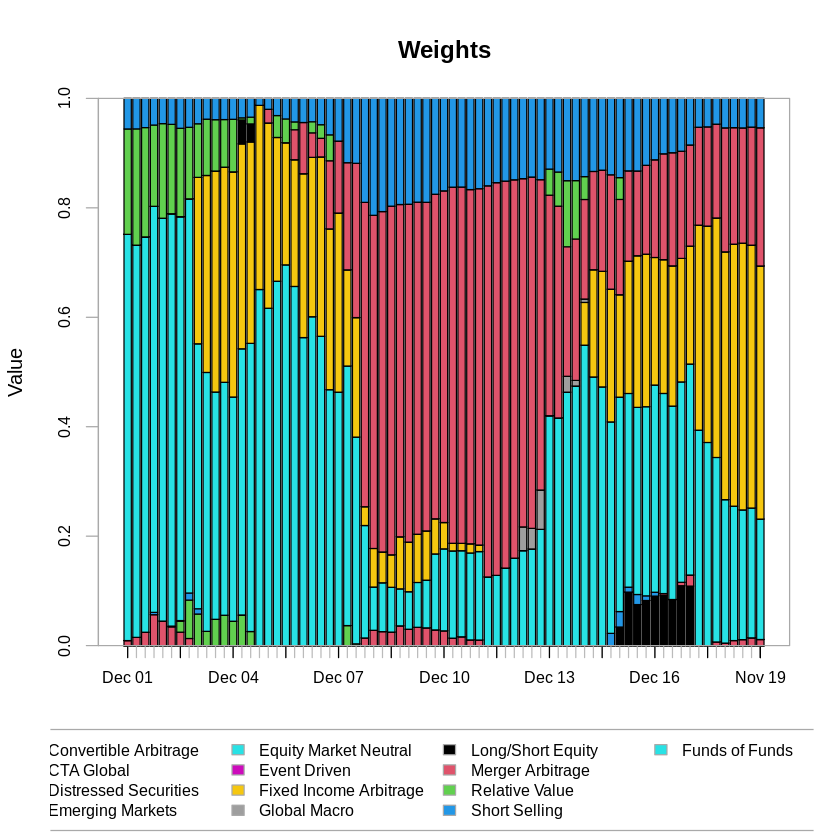

In [79]:
# Chart the weights
chart.Weights(opt_rebal_base)

In [80]:
# Compute the portfolio returns
returns_base <- Return.portfolio(R = asset_returns, weights = extractWeights(opt_rebal_base))
colnames(returns_base) <- "base"

***Bon travail! Les choses se présentent bien. Mais peut-on faire mieux ?***

####**Affiner les contraintes et les objectifs**

+ ***Ici, nous émettons l'hypothèse que le raffinement des contraintes et/ou des objectifs améliorera les performances. Ajoutons un objectif de budget de risque pour fixer un pourcentage minimum et maximum de contribution au risque pour chaque actif. Nous nous appuierons sur la spécification de portefeuille que nous avons créée. Il s'agit d'un problème d'optimisation plus complexe qui nécessitera un solveur global. Nous utiliserons donc des portefeuilles aléatoires comme méthode d'optimisation.***

####**Instructions**

+ Ajoutez un objectif de budget de risque risk_budget à port_spec où le risque est défini comme un écart type. 
+ Définissez le pourcentage de risque minimum sur 5 % et le pourcentage de risque maximum sur 10 %.
+ Exécutez l'optimisation avec un rééquilibrage trimestriel. 
+ Définissez la période d'entraînement et la fenêtre glissante pour utiliser 5 ans de données. 
+ Affectez les résultats à une variable nommée opt_rebal_rb.
+ Tracez les poids.
+ Représentez graphiquement la contribution en pourcentage du composant au risque.
+ Calculez les rendements du portefeuille à l'aide de Return.portfolio(). 
+ Affectez les retours à une variable nommée return_rb.

In [81]:
# Add a risk budge objective
port_spec <- add.objective(portfolio = port_spec, 
                           type = 'risk_budget', 
                           name = 'StdDev', 
                           min_prisk = 0.05, 
                           max_prisk = 0.1)

# Run the optimization
opt_rebal_rb <- optimize.portfolio.rebalancing(R = asset_returns, 
                                               portfolio = port_spec, 
                                               optimize_method = "random", rp = rp,
                                               trace = TRUE,
                                               rebalance_on = 'quarters', 
                                               training_period = 60,
                                               rolling_window = 60)

print(opt_rebal_rb)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01

Leve

**************************************************
PortfolioAnalytics Optimization with Rebalancing
**************************************************

Call:
optimize.portfolio.rebalancing(R = asset_returns, portfolio = port_spec, 
    optimize_method = "random", trace = TRUE, rp = rp, rebalance_on = "quarters", 
    training_period = 60, rolling_window = 60)

Number of rebalancing dates:  73 
First rebalance date:
[1] "2001-12-31"
Last rebalance date:
[1] "2019-11-30"

Annualized Portfolio Rebalancing Return:
[1] 0.04943337

Annualized Portfolio Standard Deviation:
[1] 0.03119739



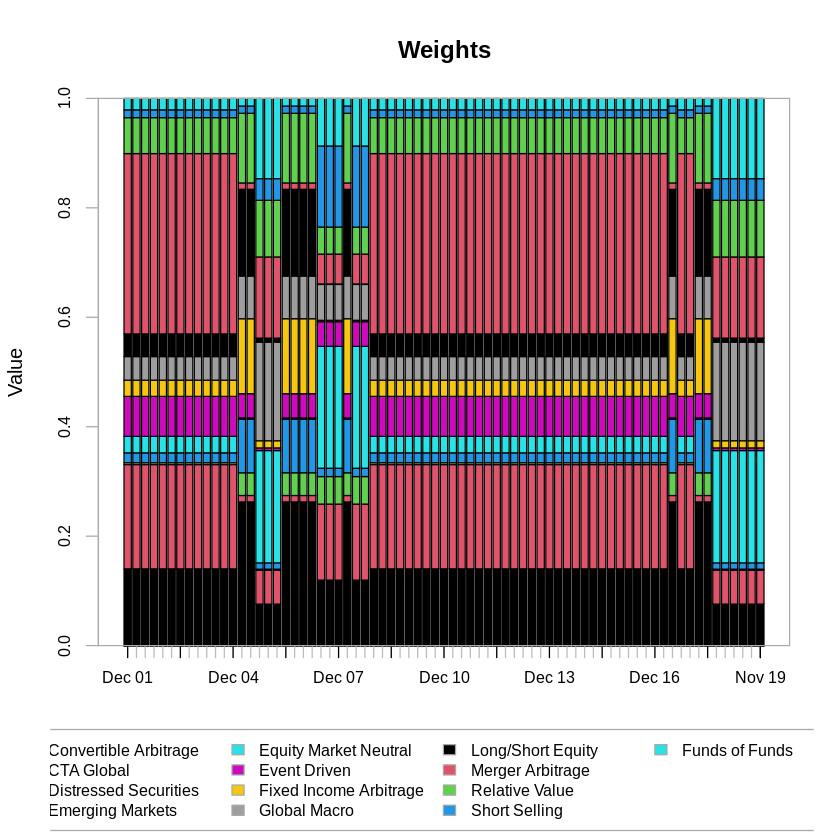

In [82]:
# Chart the weights
chart.Weights(opt_rebal_rb)

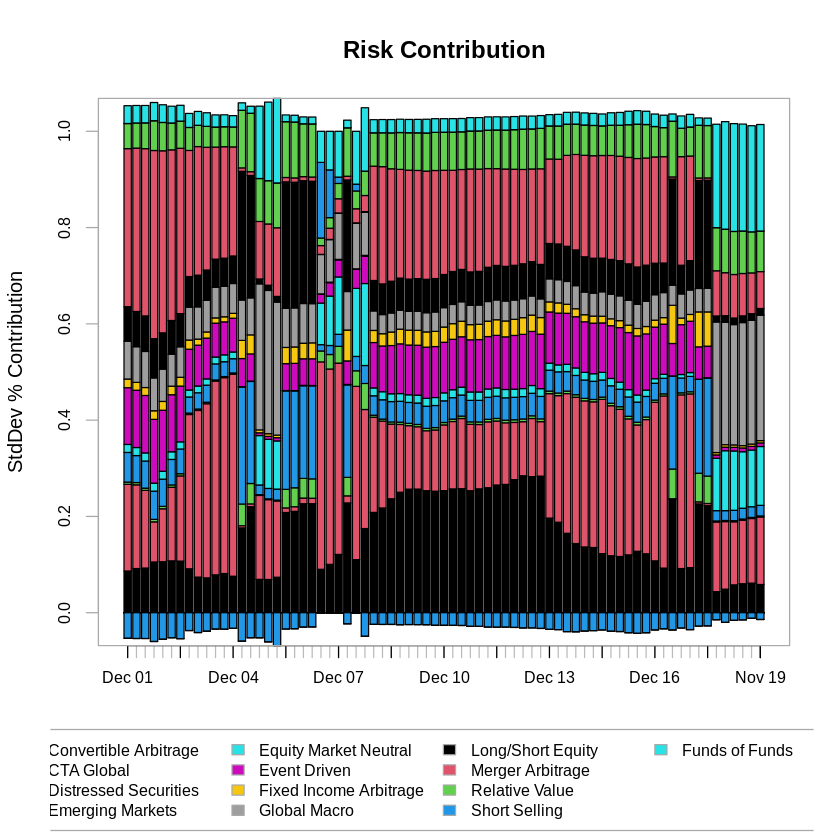

In [83]:
# Chart the percentage contribution to risk
chart.RiskBudget(opt_rebal_rb, match.col = "StdDev", risk.type = "percentage")

In [84]:
# Compute the portfolio returns
returns_rb <- Return.portfolio(R = asset_returns, weights = extractWeights(opt_rebal_rb))
colnames(returns_rb) <- "risk_budget"

####**De meilleures estimations conduisent-elles à de meilleures performances ?**
+ ***Faisons l'hypothèse que l'utilisation d'une estimation robuste de la matrice de variance-covariance surpassera la matrice de variance-covariance de l'échantillon. En théorie, de meilleures estimations devraient conduire à de meilleurs résultats. Nous utiliserons la fonction moments_robust() qui a été définie au chapitre 3 et la spécification du portefeuille du dernier exercice.***

####**Instructions**

+ Exécutez l'optimisation à l'aide de la fonction moments_robust() pour estimer les moments. 
+ Le backtest d'optimisation utilisera les mêmes paramètres que précédemment, rééquilibrage trimestriel avec période de formation et fenêtre glissante pour utiliser 5 ans de données. 
+ Affectez les résultats à une variable nommée opt_rebal_rb_robust.
+ Tracez les poids.
+ Représentez graphiquement la contribution en pourcentage du composant au risque.
+ Calculez les rendements du portefeuille à l'aide de Return.portfolio(). 
+ Affectez les retours à une variable nommée return_rb_robust.

In [ ]:
# Run the optimization
opt_rebal_rb_robust <- optimize.portfolio.rebalancing(R = asset_returns, 
                                                      momentFUN = 'moments_robust',
                                                      portfolio = port_spec, 
                                                      optimize_method = "random", rp = rp,
                                                      trace = TRUE,
                                                      rebalance_on = "quarters", 
                                                      training_period = 60,
                                                      rolling_window = 60)

print(opt_rebal_rb_robust)

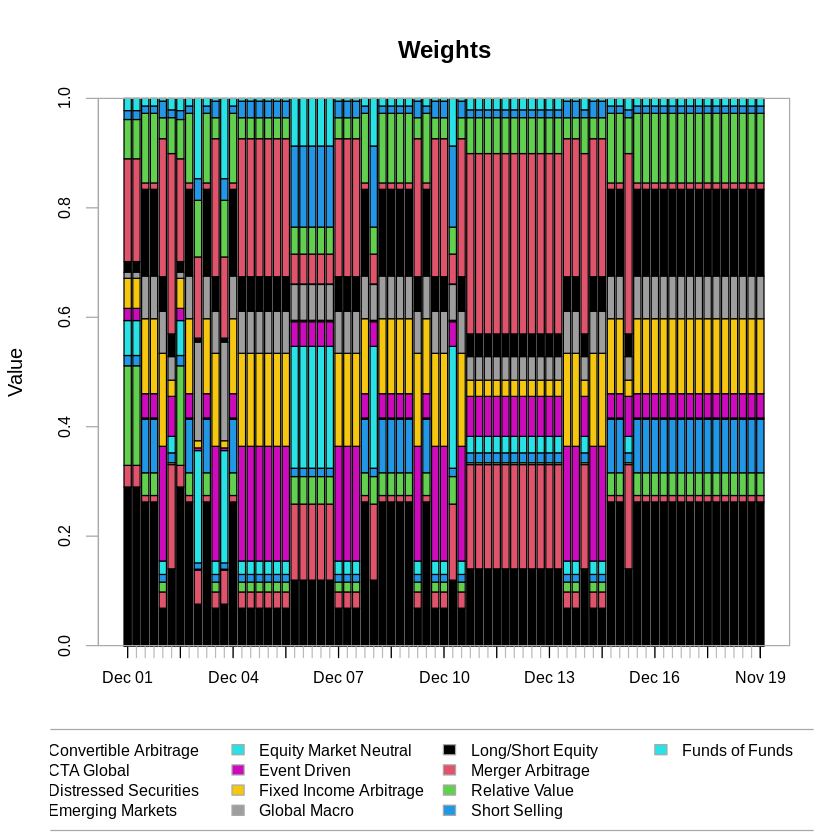

In [86]:
# Chart the weights
chart.Weights(opt_rebal_rb_robust)

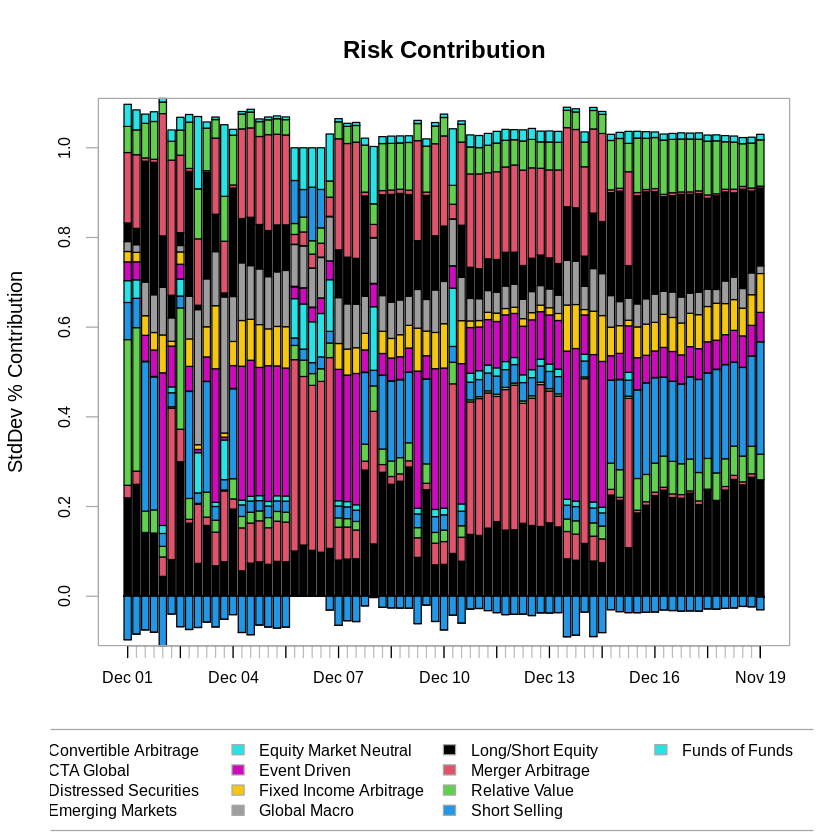

In [87]:
# Chart the percentage contribution to risk
chart.RiskBudget(opt_rebal_rb_robust, match.col = "StdDev", risk.type = "percentage")

In [88]:
# Compute the portfolio returns
returns_rb_robust <- Return.portfolio(R = asset_returns, weights = extractWeights(opt_rebal_rb_robust))
colnames(returns_rb_robust) <- "rb_robust"

***Bon travail! Vous avez maintenant quelques modèles à comparer. Il est temps de voir comment vous avez fait !***

####**Analyser les résultats et comparer au benchmark**

+ ***Dans les exercices précédents du chapitre, nous avons créé un benchmark de poids égal r_benchmark et exécuté les optimisations suivantes :***

  + **Minimisez l'écart type du portefeuille avec des exemples d'estimations (rendements stockés dans return_base).**
  + **Minimisez l'écart type du portefeuille avec un pourcentage de contribution au risque à l'aide d'estimations d'échantillons (rendements stockés dans return_rb).**
  + **Minimisez l'écart type du portefeuille avec un pourcentage de contribution au risque à l'aide d'estimations robustes (rendements stockés dans return_rb_robust).**

+ *Nous souhaitons maintenant analyser les performances des backtests d'optimisation et comparer avec le benchmark.*

####**Instructions**

+ Combinez les rendements du portefeuille de référence et les optimisations dans un seul objet xts.
+ Calculez et affichez les rendements annualisés.
+ Tracez le rendement cumulé et les prélèvements.

In [89]:
# Combine the returns
ret <- cbind(r_benchmark, returns_base, returns_rb, returns_rb_robust)

# Compute annualized returns
table.AnnualizedReturns(R = ret)

,benchmark,base,risk_budget,rb_robust
,<dbl>,<dbl>,<dbl>,<dbl>
Annualized Return,0.0592,0.0312,0.0494,0.0487
Annualized Std Dev,0.0346,0.0173,0.0312,0.0414
Annualized Sharpe (Rf=0%),1.7143,1.8111,1.5845,1.1788


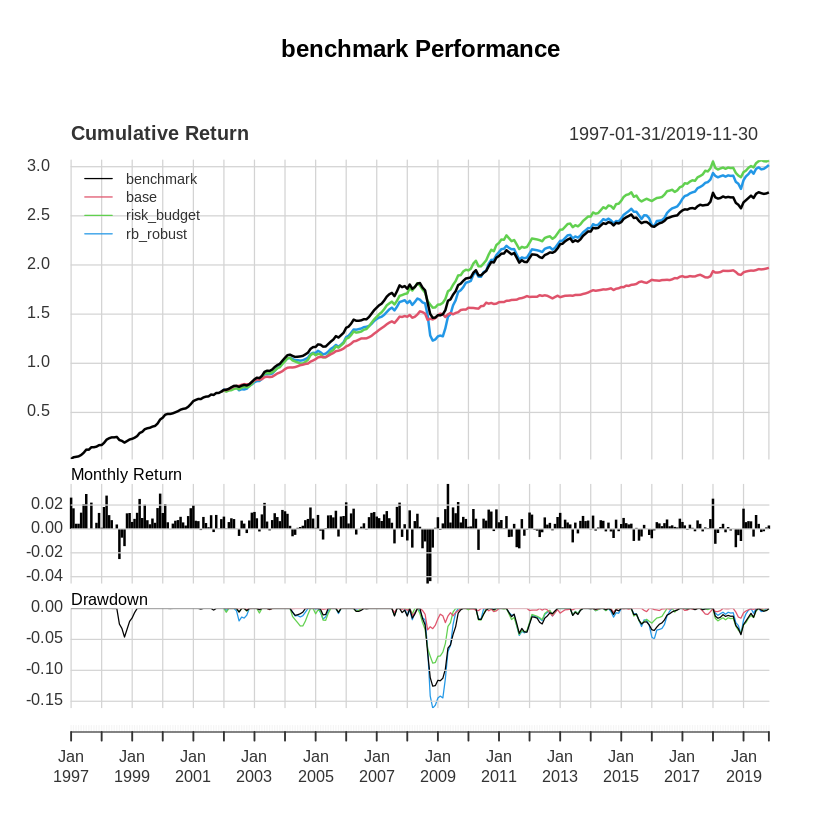

In [90]:
# Chart the performance summary
charts.PerformanceSummary(R = ret)

***On dirait que le modèle robuste a plutôt bien fonctionné ! Quelles autres comparaisons pouvez-vous faire ?***